# Lending Club Case Study

## Problem Statement


Lending Club case study, works for a consumer finance company specializing in lending various loans to urban customers. When the company receives a loan application, the company has to decide on loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision.

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, i.e. he/she is likely to default. Approving the loan may lead to a financial loss for the company. 

The data below contains information about past loan applicants and whether they ‘defaulted’. The aim is to identify patterns that indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of the loan, lending (to risky applicants) at a higher interest rate and many more.

## Objective


The goal is to identify loan applicants who are at risk of defaulting, in order to minimize credit losses. This case study will use exploratory data analysis (EDA) with the provided dataset to achieve this objective.

Essentially, the company aims to identify the key factors (or driver variables) that contribute to loan default, i.e., the variables that strongly indicate potential default. This knowledge can be used by the company for portfolio and risk assessment purposes."

### Import required libraries

In [541]:
# Numerical and Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

### Data Loading

In [543]:
# Load the dataset and read the csv file
loan_df = pd.read_csv('loan.csv')

In [544]:
# Display first 5 rows to understand the structure of the dataset
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Understanding

In [546]:
# Check the basic info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [547]:
# Loan dataset contains 39717 rows and 111 columns
# According to the dtypes:
# - Numerical columns --> float64(74) and int64(13)
# - Categorical columns --> object(24)

In [548]:
# Check the columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [549]:
loan_df.value_counts()

Series([], Name: count, dtype: int64)

In [550]:
# Check numerical columns and summarize the values
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data cleanup

In [552]:
# Check whether there are any duplicate rows
duplicate_rows=len(loan_df[loan_df.duplicated()])
duplicate_rows

0

In [553]:
# Check for null values in the data set in descending order so we can check from the highest null values
loan_df.isna().sum().sort_values(ascending=False)

total_il_high_credit_limit    39717
total_bc_limit                39717
total_bal_ex_mort             39717
tot_hi_cred_lim               39717
num_bc_sats                   39717
                              ...  
loan_status                       0
url                               0
loan_amnt                         0
member_id                         0
id                                0
Length: 111, dtype: int64

In [554]:
empty_columns = 0
total_columns = loan_df.shape[1]
for col in loan_df.columns:
    if loan_df[col].isna().sum() == loan_df.shape[0]:
        empty_columns+=1;
print('Total Columns: ',total_columns,'\nEmpty columns: ',empty_columns)

Total Columns:  111 
Empty columns:  54


In [555]:
# Check the null values in percentage
null_values=100*loan_df.isnull().sum().sort_values(ascending=False)/len(loan_df)
null_values

total_il_high_credit_limit    100.0
total_bc_limit                100.0
total_bal_ex_mort             100.0
tot_hi_cred_lim               100.0
num_bc_sats                   100.0
                              ...  
loan_status                     0.0
url                             0.0
loan_amnt                       0.0
member_id                       0.0
id                              0.0
Length: 111, dtype: float64

In [556]:
##Strategy:
# (a) Columns having high percentage of missing values, discard that column from ananlysis
# (b) Columns having missing values under acceptable range we prefer to impute them (replace with some values) 
# (c) For numerical columns we prefer to use mean or median.(Median is preferred) 
# (d) Median is not affected with the outliers. (Extreme values) 
# (e) For categorical columns we prefer to use mode.

# Drop the columns with null values
loan_df.dropna(axis=1,how='all',inplace=True)

In [557]:
loan_df.shape

(39717, 57)

In [558]:
# Find unique values of a column
loan_df.nunique().sort_values()

pymnt_plan                        1
policy_code                       1
application_type                  1
acc_now_delinq                    1
delinq_amnt                       1
chargeoff_within_12_mths          1
tax_liens                         1
initial_list_status               1
collections_12_mths_ex_med        1
term                              2
next_pymnt_d                      2
loan_status                       3
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [559]:
# Delete the columns with only one unique value, all records has same values for this column, which will be of no use for our analysis
single_value_columns = []
for col in loan_df.columns:
    # check if number of unique value is 1 in a column
    if loan_df[col].nunique() == 1:
        single_value_columns.append(col)
loan_df.drop(single_value_columns,axis=1,inplace=True)        

In [560]:
loan_df.shape

(39717, 48)

In [561]:
# Check columns with null values(in percentage) in descending order 
print((loan_df.isnull().sum()/loan_df.shape[0]*100).round(2).sort_values(ascending=False))

next_pymnt_d               97.13
mths_since_last_record     92.99
mths_since_last_delinq     64.66
desc                       32.59
emp_title                   6.19
emp_length                  2.71
pub_rec_bankruptcies        1.75
last_pymnt_d                0.18
revol_util                  0.13
title                       0.03
last_credit_pull_d          0.01
id                          0.00
funded_amnt_inv             0.00
term                        0.00
loan_amnt                   0.00
member_id                   0.00
issue_d                     0.00
verification_status         0.00
annual_inc                  0.00
home_ownership              0.00
grade                       0.00
sub_grade                   0.00
int_rate                    0.00
installment                 0.00
funded_amnt                 0.00
dti                         0.00
earliest_cr_line            0.00
addr_state                  0.00
purpose                     0.00
zip_code                    0.00
url       

In [562]:
# Drop columns with 60% or more empty values
missing_vals_60 = []
for col in loan_df.columns:
    missing_vals_per = round(loan_df[col].isna().sum() / loan_df.shape[0], 2)
    if missing_vals_per >= 0.60:
        missing_vals_60.append(col)
print("Columns with atleast 60 % missing values", missing_vals_60)
loan_df.drop(missing_vals_60, axis = 1, inplace = True)
        
loan_df.shape

Columns with atleast 60 % missing values ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


(39717, 45)

In [563]:
# After dropping columns with more than 60% missing values, with the highest being around 32.6% for the desc column. Let's drop other irrelevant columns that will be of no use.

#Let's add the irrelevant columns in an array and remove it at once
irrelevant_columns = []
irrelevant_columns.extend(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'])

# Drop desc,emp_title,title,url, and emp title, title is a categorical field and they are of no use
irrelevant_columns.extend(['title','emp_title','desc','url'])

# Drop zip_code as it is a masked data and cannot be used
irrelevant_columns.extend(['zip_code'])

# Drop member_id as it is a duplicate index column
irrelevant_columns.extend(['member_id'])

# Drop funded_amnt_inv as it is calculated post loan approval
irrelevant_columns.extend(['funded_amnt_inv'])

# Shape of the data frame after removing columns
print(irrelevant_columns)
loan_df.drop(irrelevant_columns,axis=1,inplace=True)
loan_df.shape

['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'title', 'emp_title', 'desc', 'url', 'zip_code', 'member_id', 'funded_amnt_inv']


(39717, 18)

## Data Preparation

In [565]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [566]:
# Check the loan status that will be in handy
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [567]:
# Drop the rows which has loan_status as 'current' since the loan payment is inprogress which does not help to decide chances of potential defaulters
loan_df = loan_df[loan_df.loan_status.str.lower() != 'current']

In [568]:
loan_df.shape

(38577, 18)

### Data Coversion and Formatting

In [570]:
# Check the terms
loan_df.term.value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [571]:
# Remove the months to make it numerical
loan_df['term'] = loan_df['term'].str.replace('months','')
loan_df.term.head()                                     

0     36 
1     60 
2     36 
3     36 
5     36 
Name: term, dtype: object

In [572]:
loan_df.int_rate.value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.15%      1
21.48%      1
24.40%      1
16.01%      1
14.67%      1
Name: count, Length: 370, dtype: int64

In [573]:
# int_rate contains values with % sign so we will replace it
loan_df["int_rate"] = loan_df.int_rate.apply(lambda x : float(x.replace("%","")))

In [574]:
loan_df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [575]:
loan_df.grade.value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [576]:
loan_df.sub_grade.value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

In [577]:
# Convert type of grade and subgrade to category
loan_df.grade=loan_df.grade.astype('category')
loan_df.sub_grade=loan_df.sub_grade.astype('category')
print(loan_df.grade.dtype)
print(loan_df.sub_grade.dtype)

category
category


In [578]:
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [579]:
# emp_length contains alphanumeric values so we will remove years and  keep the numerical values only
emp_length_mapping: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10, 'n/a':0
}

loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_mapping)
loan_df.emp_length.value_counts()

emp_length
10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [580]:
loan_df.verification_status.value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [581]:
# Update Source Verified as Verified
loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)
loan_df.verification_status=loan_df.verification_status.astype('category')

In [582]:
def bucket_data(column, thresholds, labels) -> str:
    
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]

### Derived columns (Create new columns from the existing columns)

In [584]:
loan_df.home_ownership=loan_df.home_ownership.astype('category')
loan_df.purpose=loan_df.purpose.astype('category')
loan_df.addr_state=loan_df.addr_state.astype('category')

#The values contains in MMM-YY format which needs to be converted
loan_df.issue_d=pd.to_datetime(loan_df.issue_d,format='%b-%y')
loan_df['issue_year']=pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.year
loan_df['issue_month']=pd.to_datetime(loan_df.issue_d,format='%b1. %y').dt.month

# Categorize Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_df['loan_amnt_bucket'] = loan_df['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

# Bucket Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 1.  40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_df['annual_inc_bucket'] = loan_df['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

# Bucket int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan_df['int_rate_bucket'] = loan_df['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))

# Bucket Funded Amount
funded_amnt_thresholds = [5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
loan_df['funded_amnt_bucket'] = loan_df['funded_amnt'].apply(bucket_data, args=(funded_amnt_thresholds, funded_amnt_labels))

# Bucket DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_df['dti_bucket'] = loan_df['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

In [585]:
# Checking for missing values across the rows
print((loan_df.isnull().sum(axis=1)).max())

1


### Deriving New Columns

In [587]:
#checking current information of the dataframe
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38577 non-null  int64         
 1   loan_amnt             38577 non-null  int64         
 2   funded_amnt           38577 non-null  int64         
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  category      
 7   sub_grade             38577 non-null  category      
 8   emp_length            37544 non-null  float64       
 9   home_ownership        38577 non-null  category      
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  category      
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

In [588]:
# Setting decimal point limit for all float data
for col in loan_df.columns:
    if loan_df[col].dtype == 'float64':
        loan_df[col] = loan_df[col].round(2)
loan_df.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_bucket,annual_inc_bucket,int_rate_bucket,funded_amnt_bucket,dti_bucket
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.0,RENT,...,AZ,27.65,0.0,2011,12,5K - 10K,0 1. 40k,9%-13%,5k - 10k,Very High
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.0,RENT,...,GA,1.00,0.0,2011,12,0 - 5K,0 1. 40k,13%-17%,0 - 5k,Very Low
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.0,RENT,...,IL,8.72,0.0,2011,12,0 - 5K,0 1. 40k,13%-17%,0 - 5k,Low
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.0,RENT,...,CA,20.00,0.0,2011,12,10K - 15K,40k - 50k,13%-17%,10k - 15k,Very High
5,1075269,5000,5000,36,7.90,156.46,A,A4,3.0,RENT,...,AZ,11.20,0.0,2011,12,5K - 10K,0 1. 40k,5%-9%,5k - 10k,Low


### Function Definitions

In [590]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
        
    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    
    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sns.barplot(data=filtered_dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

In [591]:
def countplot_graph(data_dict: dict, annot=True) -> None:
    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation')
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sns.countplot(x=x, hue=hue, data=df, order=order, palette=palette)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if annot:
        for p in ax.patches:
            ax.annotate('{:1}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))

    ax.set_title(title)
    
    if x_tick_rotation:
        plt.xticks(rotation=x_tick_rotation)

    plt.show()

In [592]:
def calculate_boxplot_stats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:
    quartile1 = df[column].quantile(0.25)
    quartile3 = df[column].quantile(0.75)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - iqr_multiplier * iqr
    upper_bound = quartile3 + iqr_multiplier * iqr
    return {
        'iqr': iqr,
        'quartile1': quartile1,
        'quartile3': quartile3,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

In [593]:
def plot_charged_off_percentage(df, column, stacked=False):
    
    # Calculate Charged Off percentage
    charged_off_data = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_data['Total'] = charged_off_data['Charged Off'] + charged_off_data['Fully Paid']
    charged_off_data['Charged Off %'] = round((charged_off_data['Charged Off'] * 100 / charged_off_data['Total']), 2)
    # Remove the last row with sum total
    charged_off_data = charged_off_data[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(20, 8))

    # Line plot for Charged Off Percentage
    charged_off_plot = charged_off_data[['Charged Off %']]
    line = charged_off_plot.plot(ax=ax1, marker='o', color='r', lw=2)
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off %')

    # Bar plot for Number of Loans
    loans_plot = charged_off_data.iloc[:, 0:3]
    ax2 = loans_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked)
    ax2.set_ylabel('Number of Loans')
    
    plt.show()

In [594]:
def charged_off_percent(df, column, duration):
    charged_off = df[(df[column] == duration) & (df['loan_status'] == 'Charged Off')][column].value_counts()[duration]
    total = df[df[column] == duration][column].value_counts()[duration]
    return round((charged_off / total) * 100, 2)

### Univariate Analysis


Univariate analysis

1. Categorical variables
   
    1. Ordered Categorical data
        1. Grade 
        2. Sub grade 
        3. Term (36 / 60 months) 
        4. Employment length 
        5. Issue year and month

    2. Unordered categorical data
        1. Address State 
        2. Loan purpose 
        3. Home Ownership 
        4. Loan status 
           
3. Quantitative variables
    1. Interest rate bucket 
    2. Annual income bucket 
    3. Loan amount bucket 
    4. Funded amount bucket 
    5. DTI bucket 
    6. Monthly Installment

### Ordered Categorical Variables

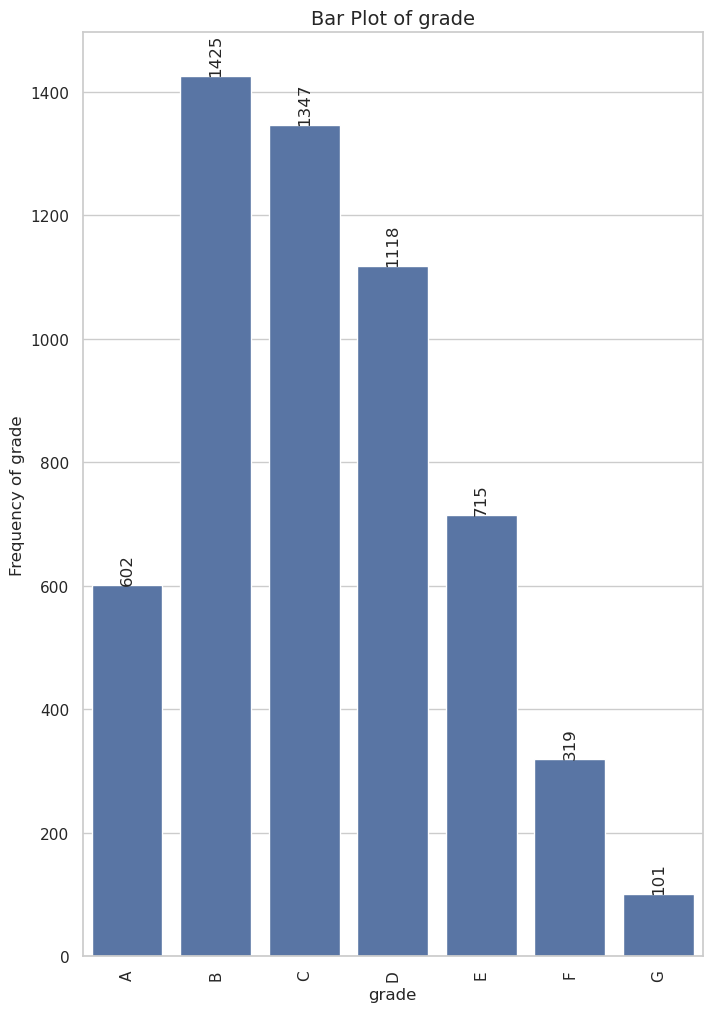

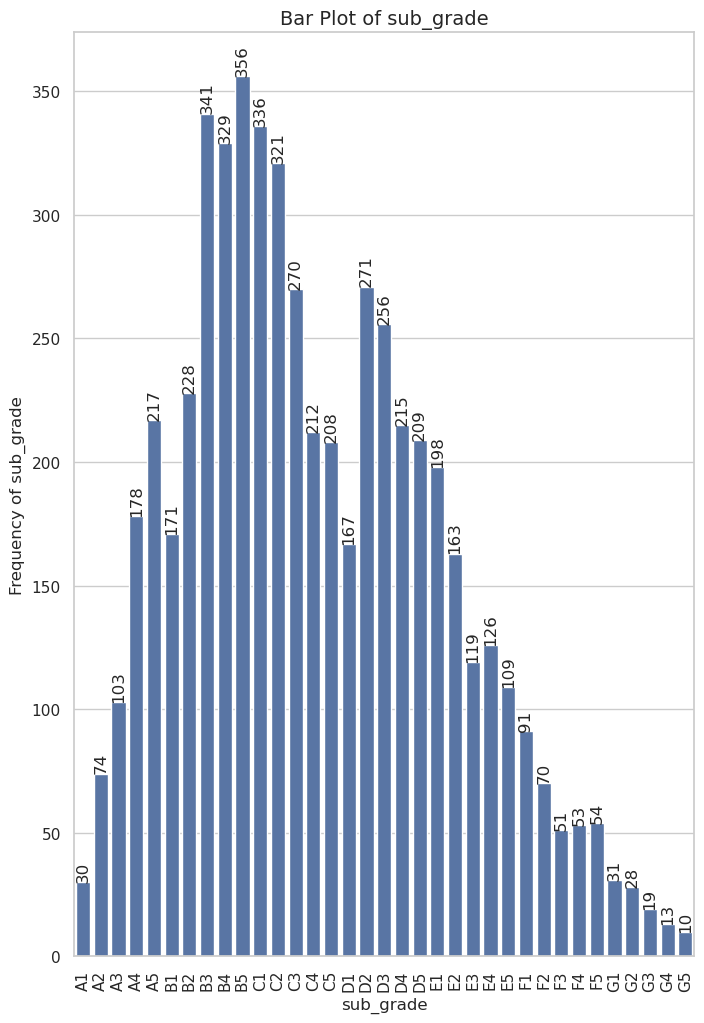

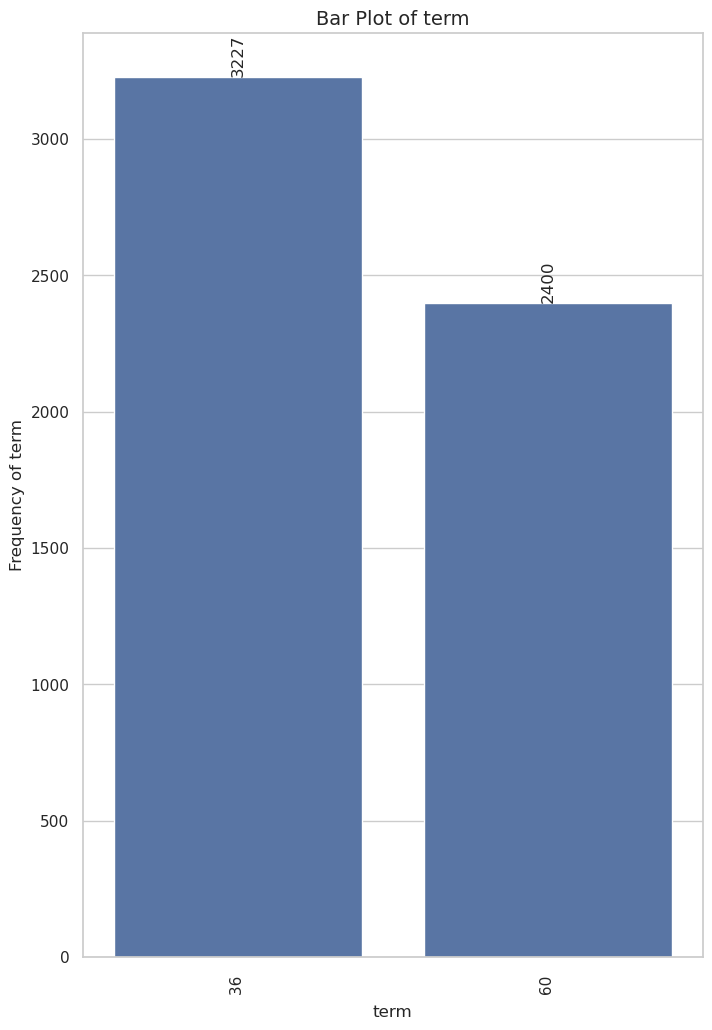

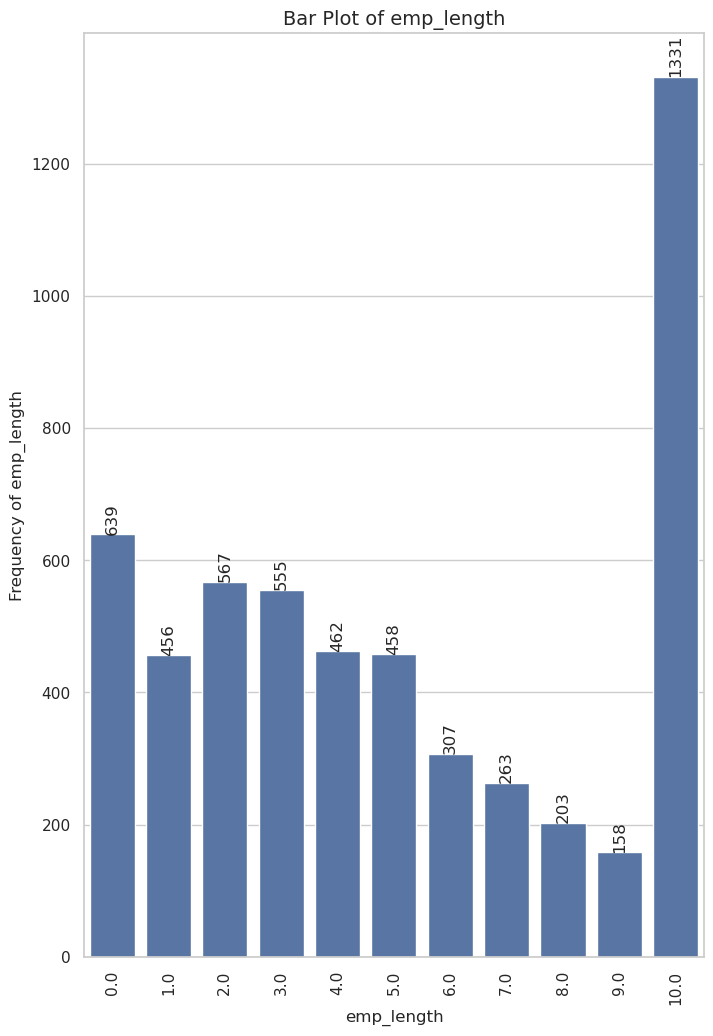

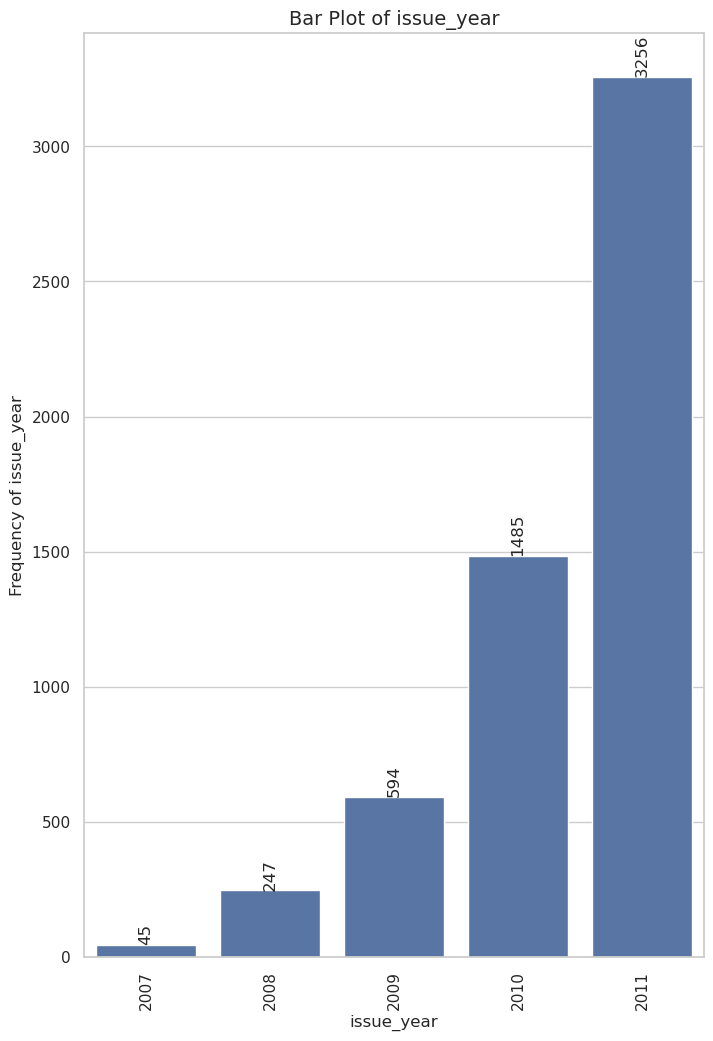

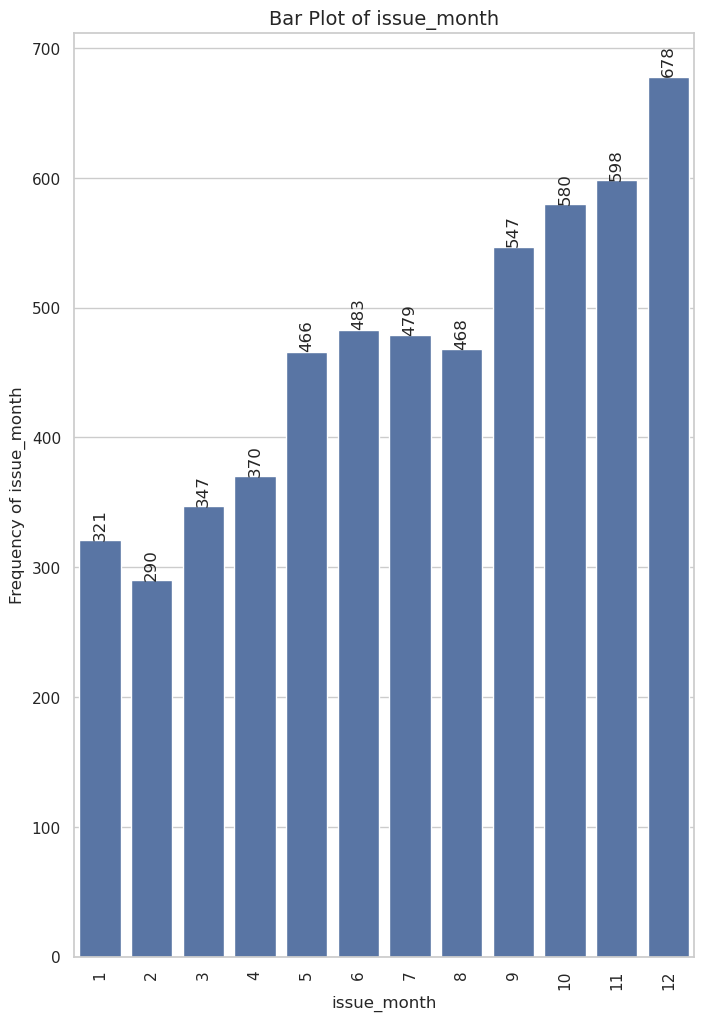

In [598]:
for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'issue_year', 'issue_month']:
    plot_bar_graph(
        loan_df,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

### Unordered Categorical Variables

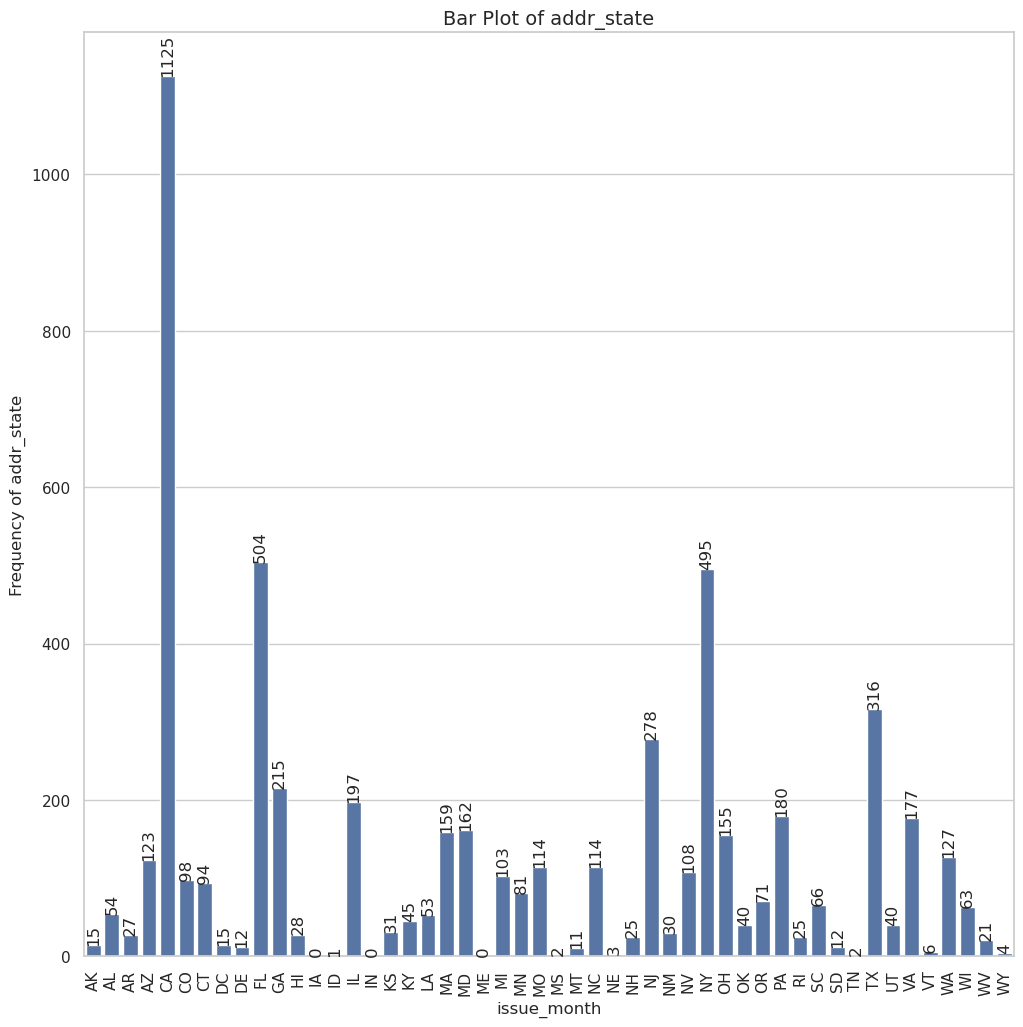

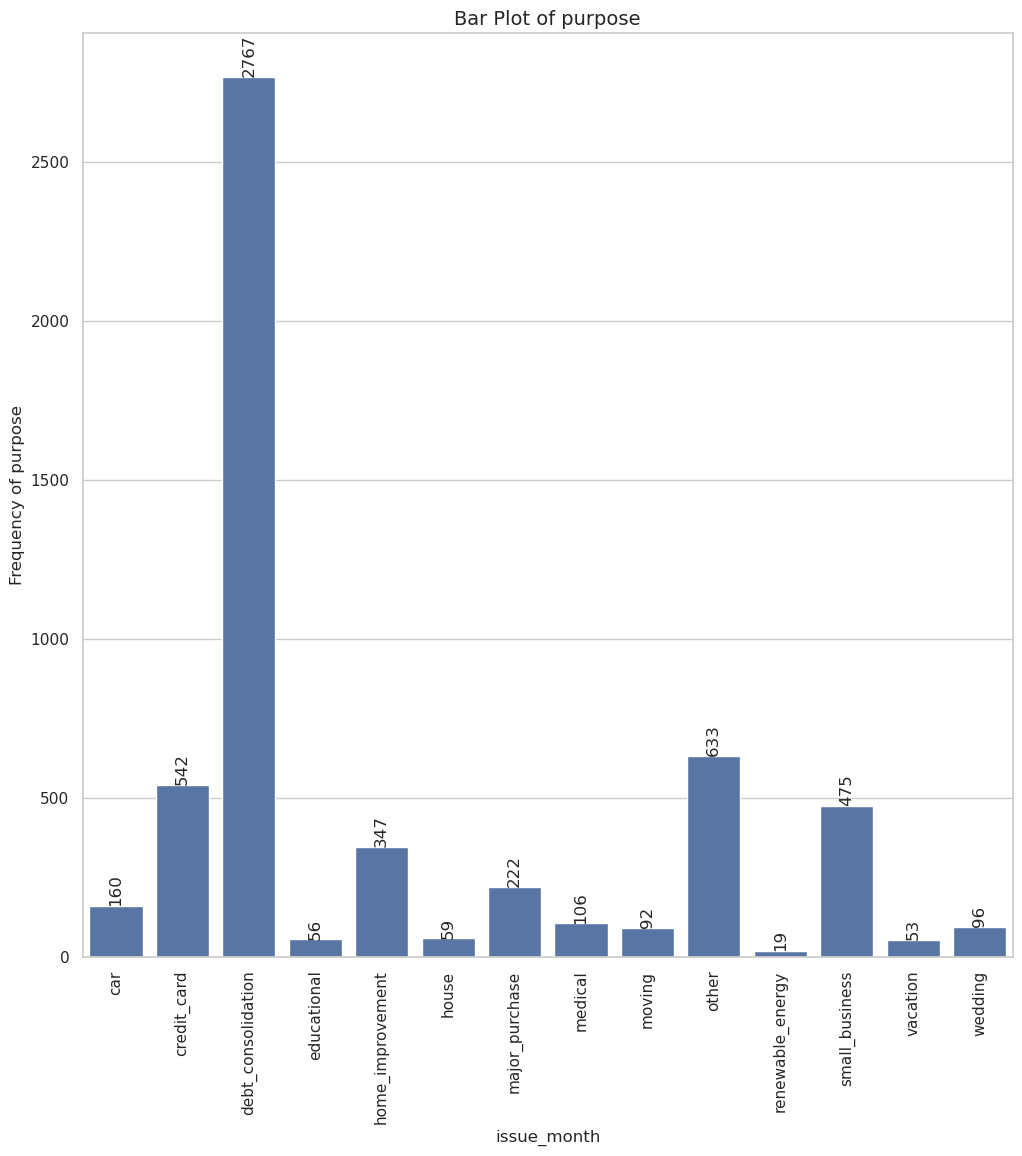

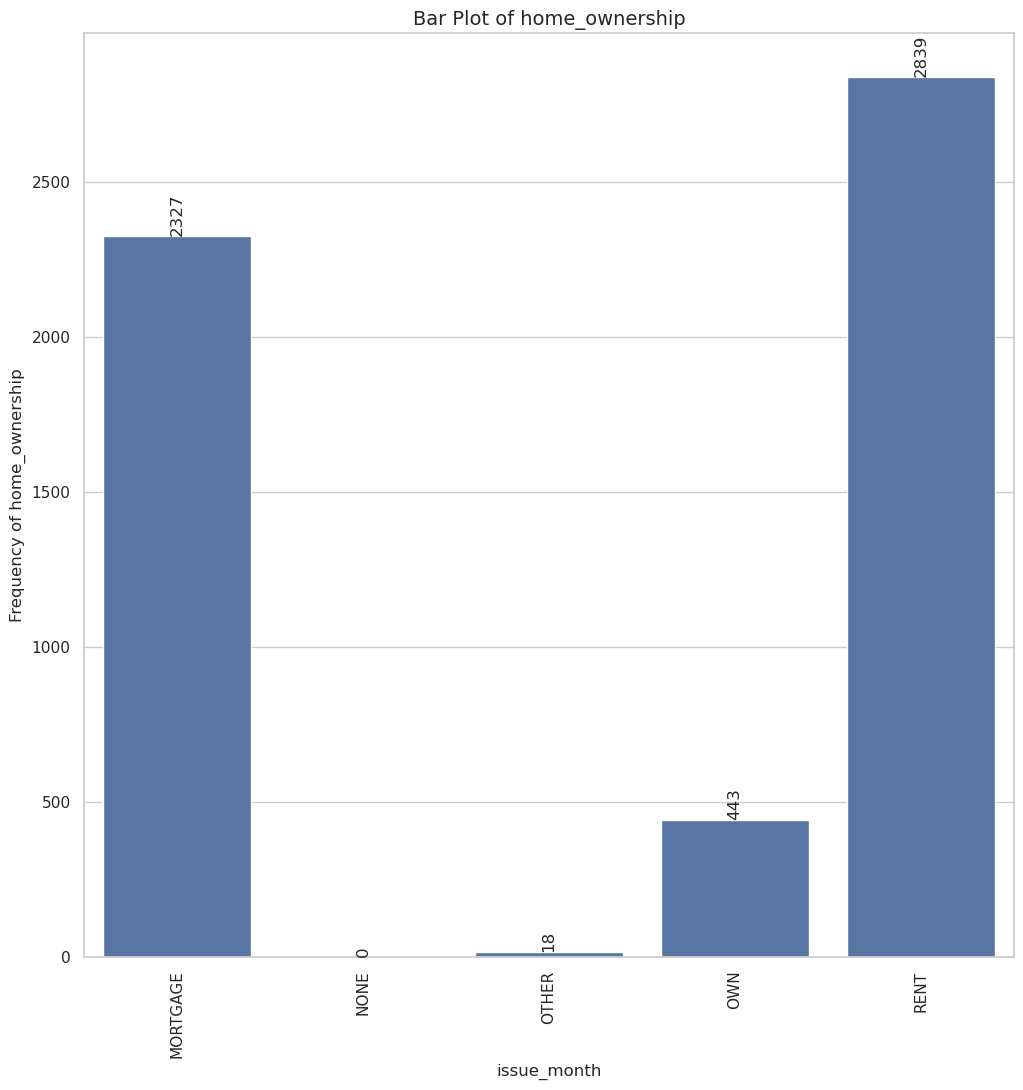

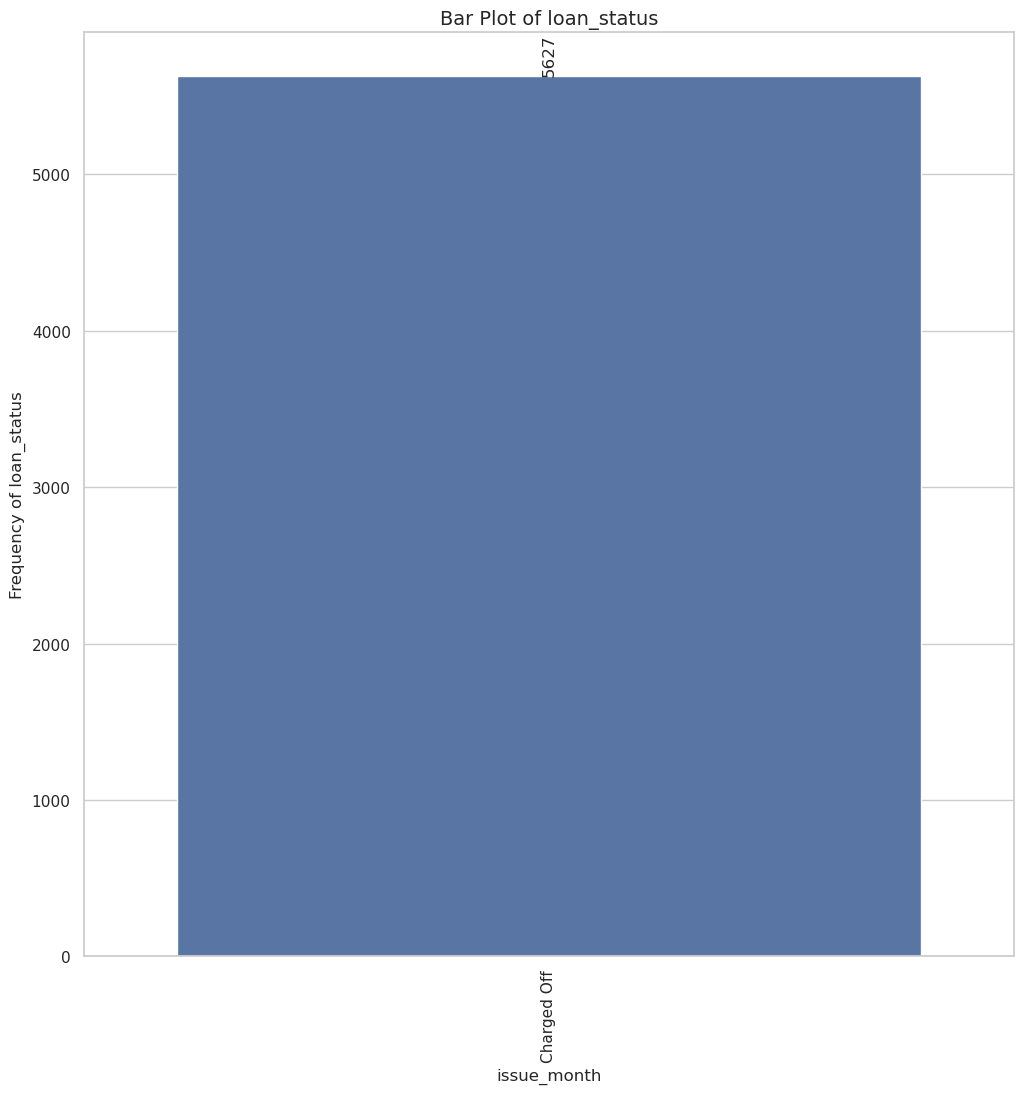

In [600]:
for un_cat_var in ['addr_state', 'purpose', 'home_ownership','loan_status']:
    plot_bar_graph(
        loan_df,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

### Quantitative variables

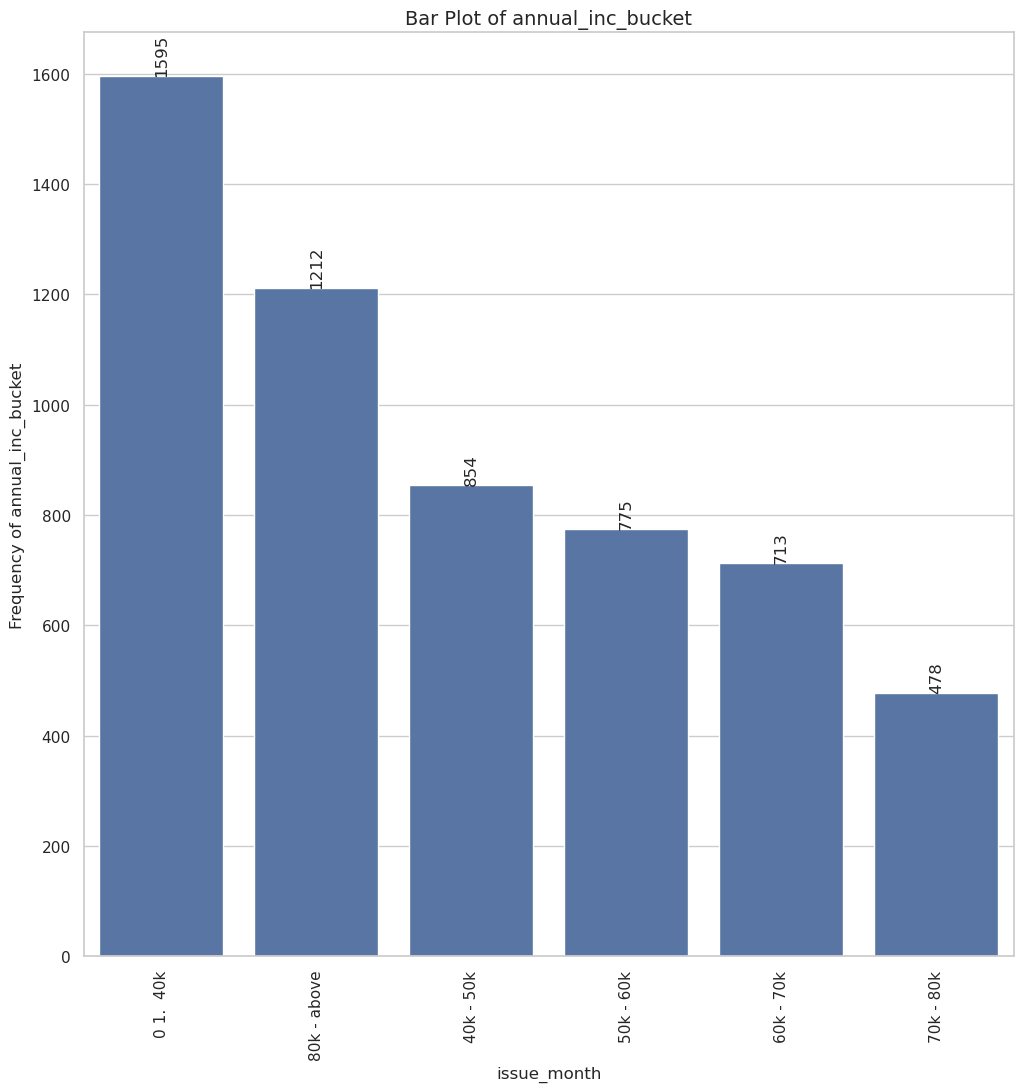

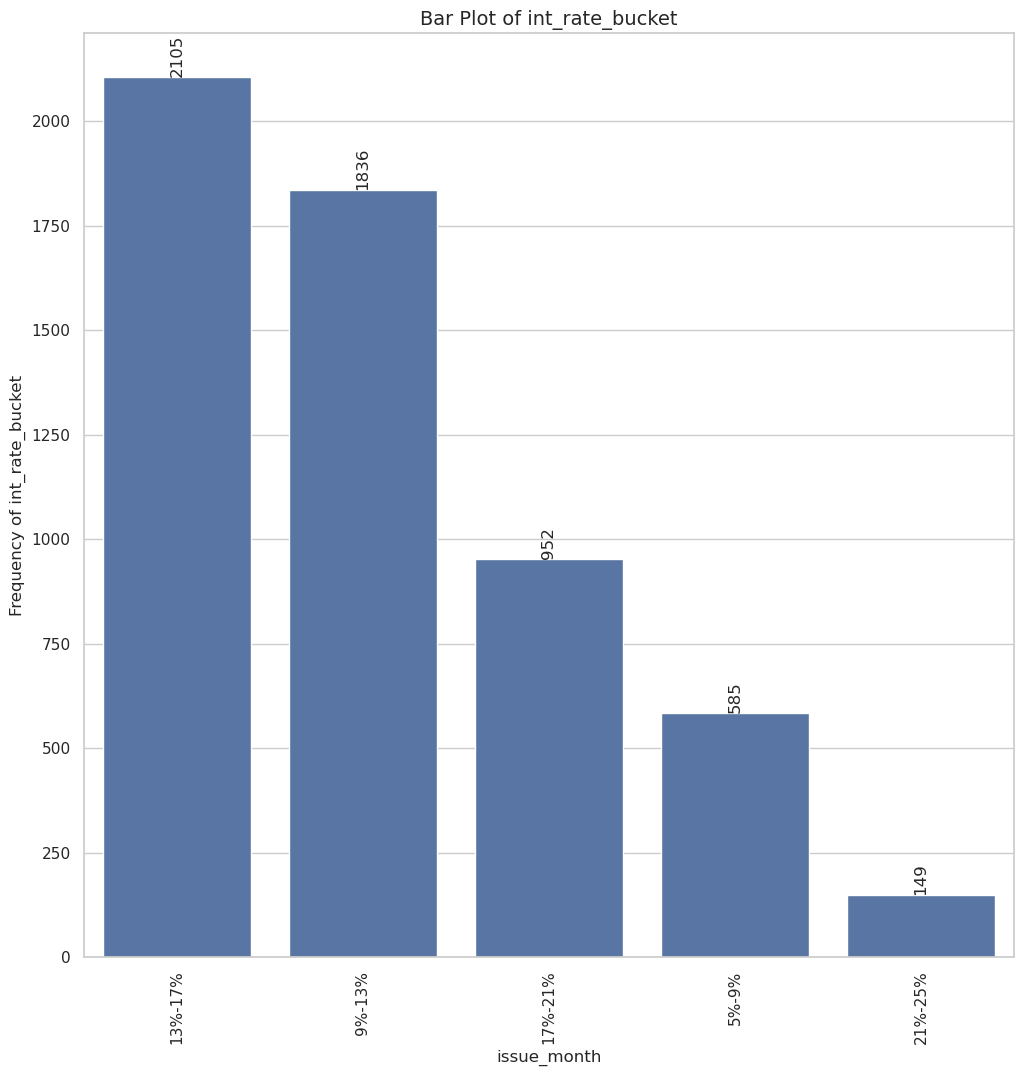

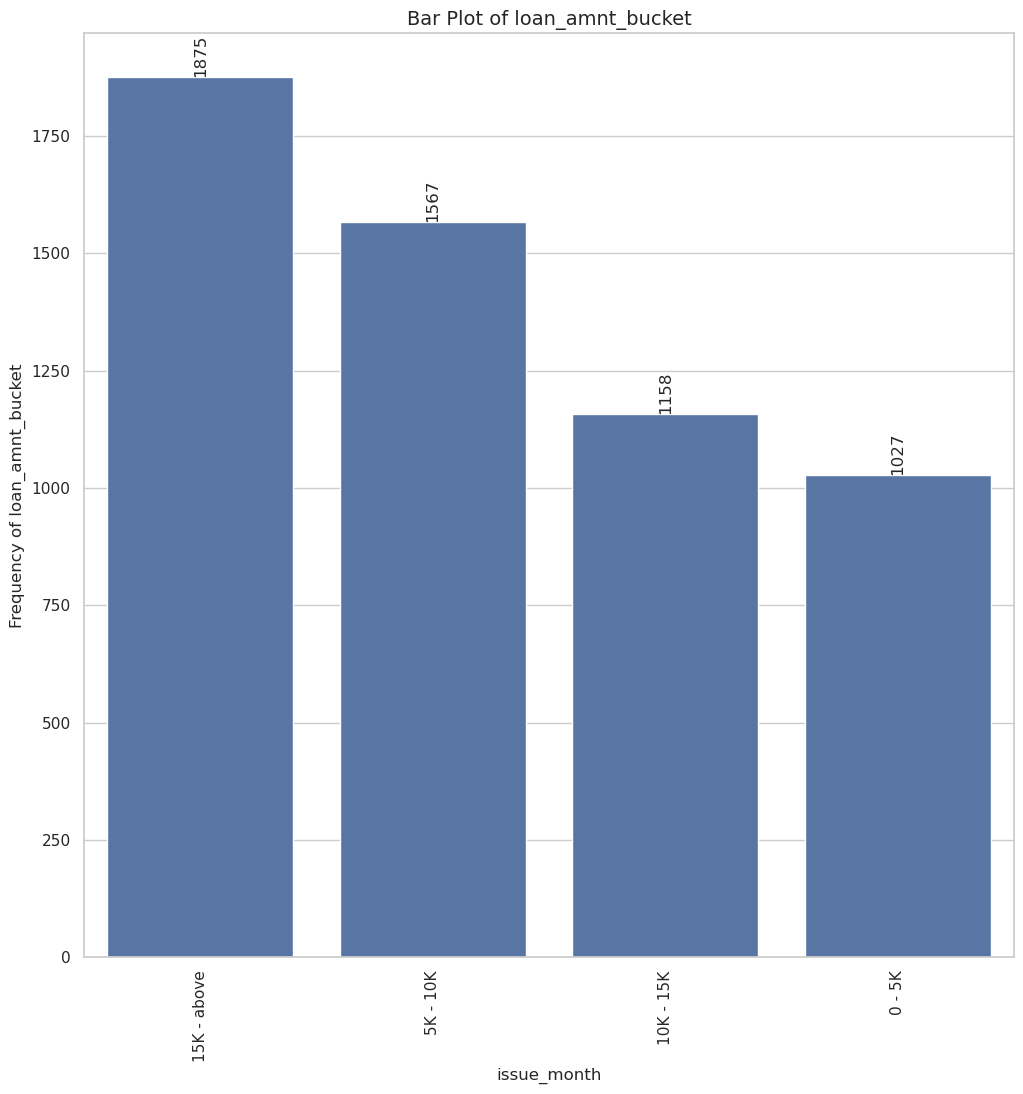

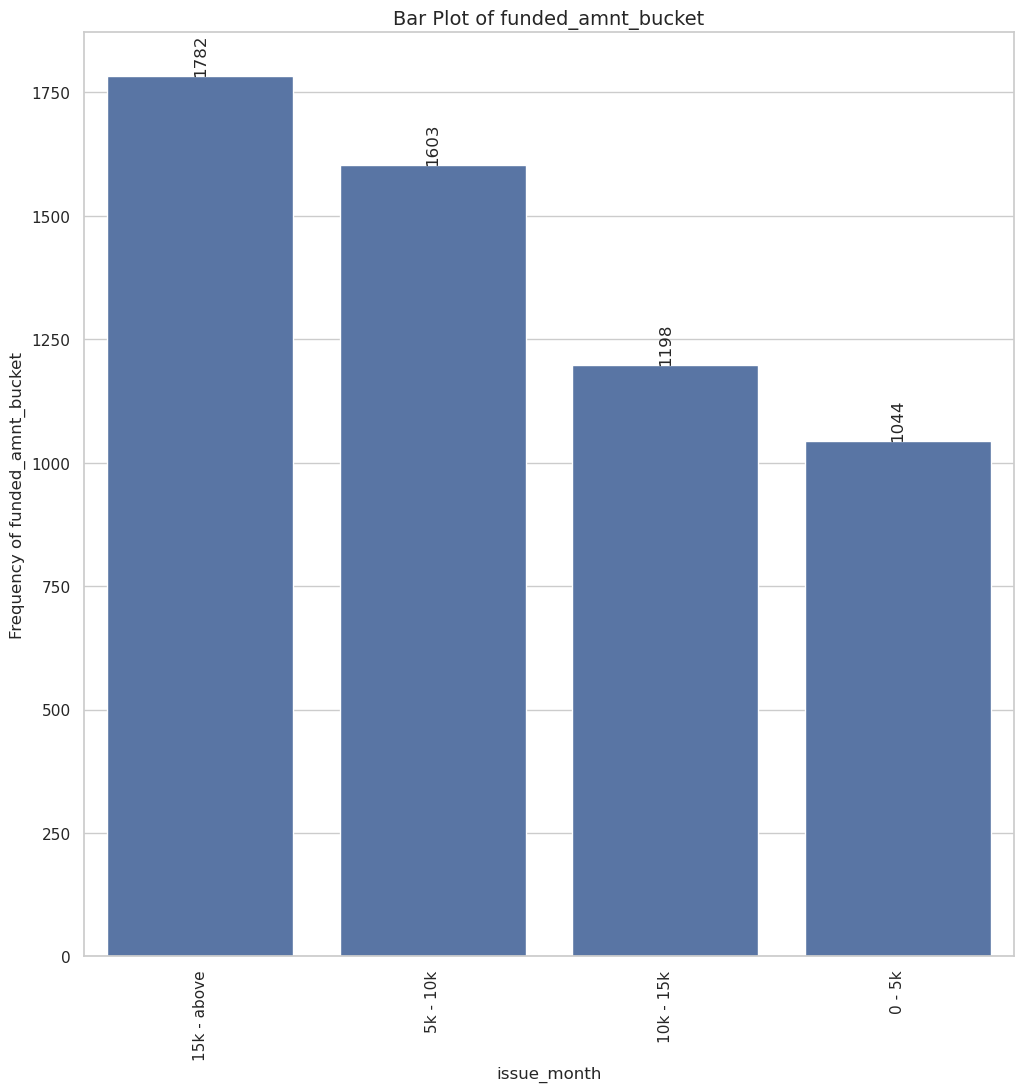

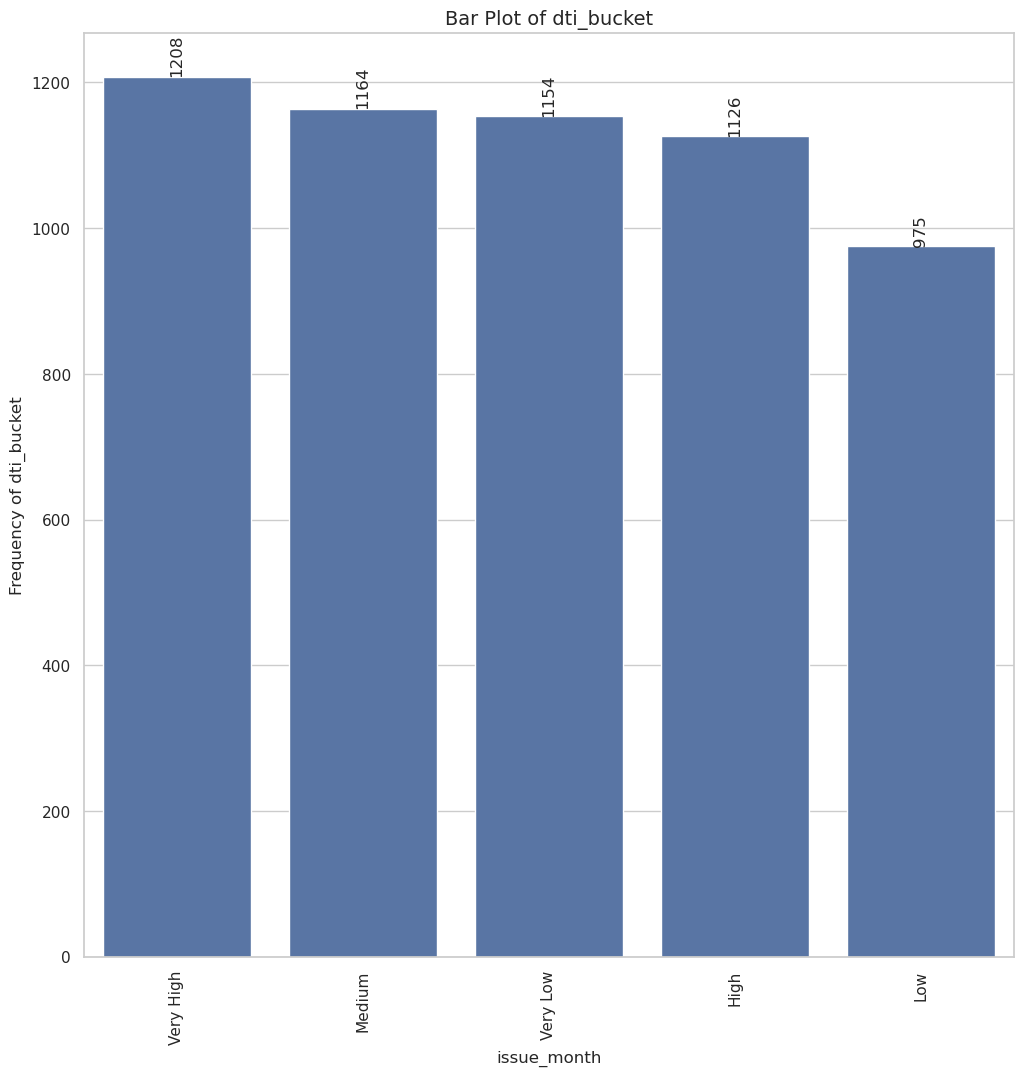

In [602]:
for quant_var in ['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket', 'dti_bucket']:
    plot_bar_graph(
        loan_df,
        x_column = quant_var,
        y_column = quant_var,
        title = f'Bar Plot of {quant_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {quant_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

### Univariate Analysis observations and inferences

1. Ordered Categorical Variables
    1. Grade B had the highest number of "Charged Off" applicants, totaling 1,425, suggesting that borrowers in this grade experienced significant difficulty in repaying their loans.

    1. A majority of "Charged Off" applicants, around 3,227, had opted for 36-month loans, indicating a trend where those who defaulted tended to choose shorter loan terms.

    1. Borrowers with over 10 years of work experience accounted for the most "Charged Off" loans, with a total of 1,331. This demonstrates that extensive work experience alone didn’t guarantee successful loan repayment.

    1. The year 2011 saw the highest number of "Charged Off" loans, with 3,256 instances. This could reflect broader economic challenges or financial instability during that period.
  
    1. Dec month saw the highest number of "Charged Off" loans with 678.
       

1. Unordered Categorical Variables
    1. CA California led in terms of "Charged Off" applicants, with 1,125 borrowers defaulting on their loans. The company should consider stricter lending criteria for applicants from states with higher default rates like California.

    1. Debt consolidation was the most common loan purpose among "Charged Off" borrowers, with 2,767 applicants. Loans for this purpose need more careful evaluation, as it is a significant factor in loan defaults.

    1. A large portion of the "Charged Off" borrowers, totaling 2,839, lived in rented properties. The financial stability of applicants living in rented homes should be closely assessed, as they may be more vulnerable to economic fluctuations.
  
    1. Total of 5627 of loan status has Charged off.



1. Quantitative variables
    1. A total of 1,595 "Charged Off" applicants had annual incomes below $40,000. For borrowers in this income bracket, the company should conduct stringent income verification and assess repayment capabilities to minimize the risk of default.
	
    1. The largest group of defaulting borrowers (2,105) fell into the interest rate range of 13%-17%. Offering more competitive, lower interest rates may help reduce the risk of defaults.
    
    1. A substantial number of defaulting applicants (1,875) had loan amounts of $15,000 or more. Higher loan amounts should be granted with caution, ensuring that borrowers have strong credit histories and proven repayment abilities.

    1. Among the "Charged Off" borrowers, 1,782 received funded amounts of $15,000 or above. The company must carefully assess whether the funded amounts align with the borrower's financial capacity to repay larger loans.

    1. High DTI ratios were common among defaulters, with 1,208 "Charged Off" borrowers having elevated DTI ratios. The company should enforce stricter DTI ratio thresholds to prevent lending to borrowers with excessive debt burdens.

### Bivariate Analysis

Bivariate analysis against Loan Status (loan_status) column

1. Categorical variables
    1. Ordered categorical data
        1. Grade
        2. Subgrade 
        3. Term (36 / 60 months)
        4. Employment length 
        5. Loan year 
        6. Loan month 
        

    2. Unordered categorical data
        1. Loan purpose 
        2. Home Ownership 
        3. Verification 
        4. Address State 
    
2. Quantitative variables
    1. Int Rate Bucket 
    2. DTI Bucket 
    3. Annual Income Bucket 
    4. Funded Amount Bucket 
    5. Loan Amount Bucket 

### Bivariate Analysis of Ordered Categorical Variables

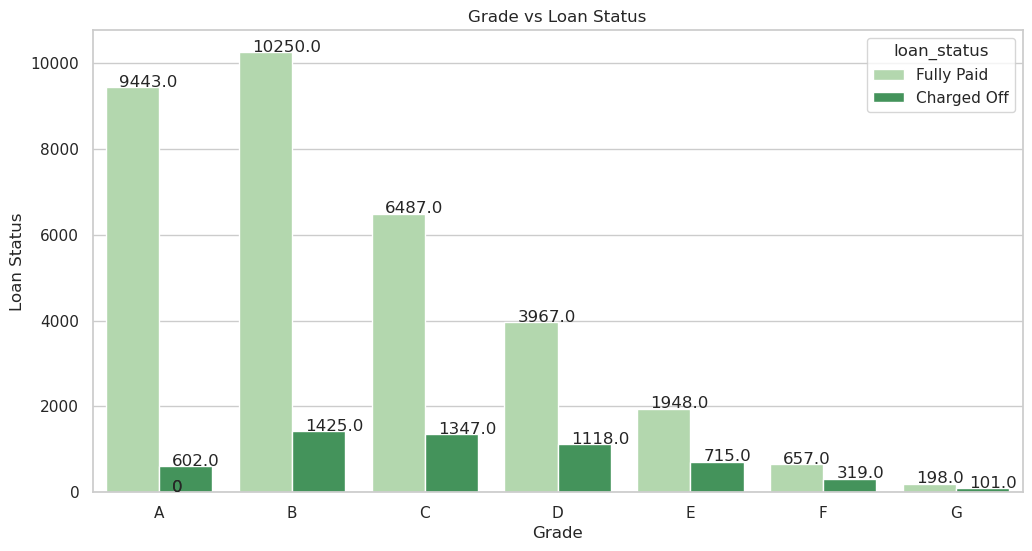

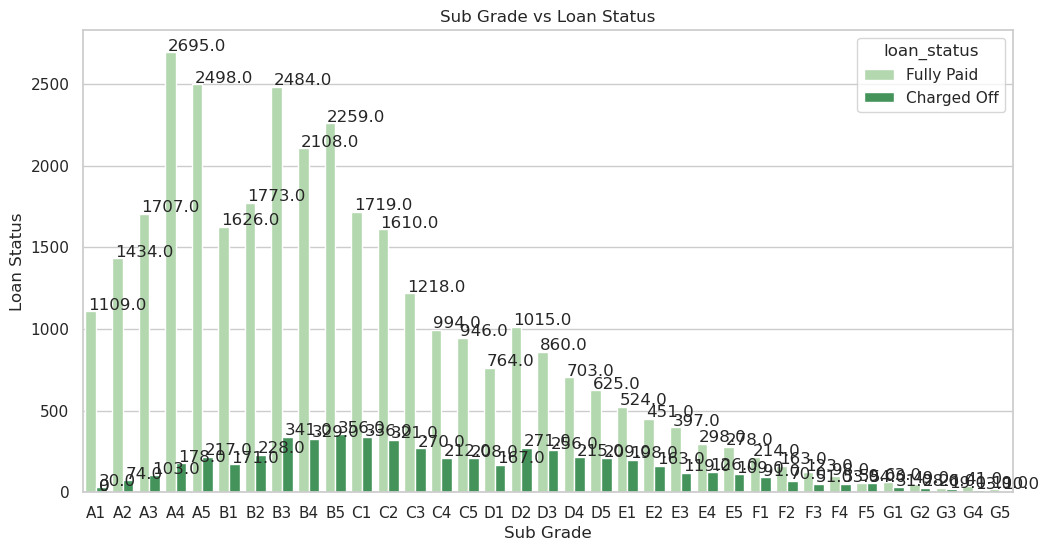

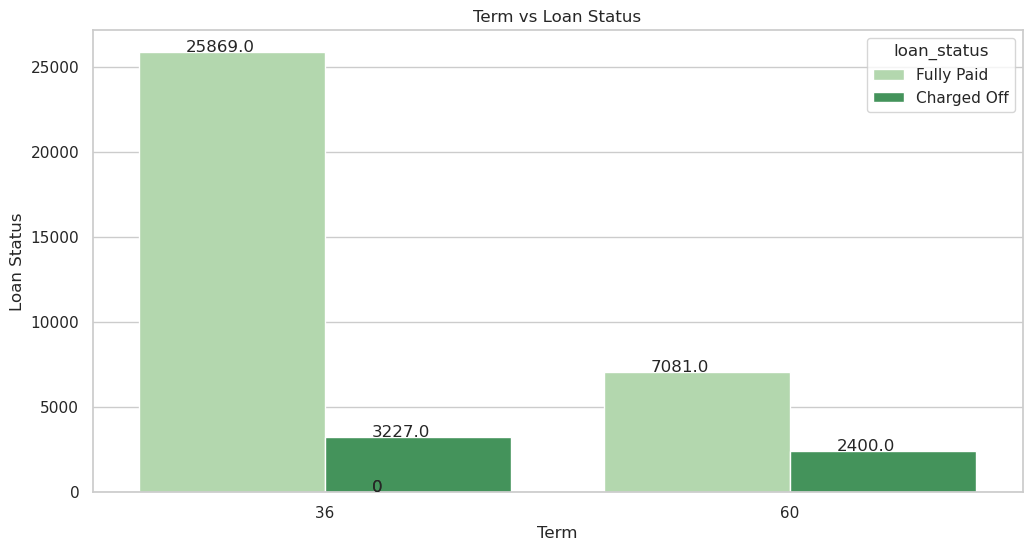

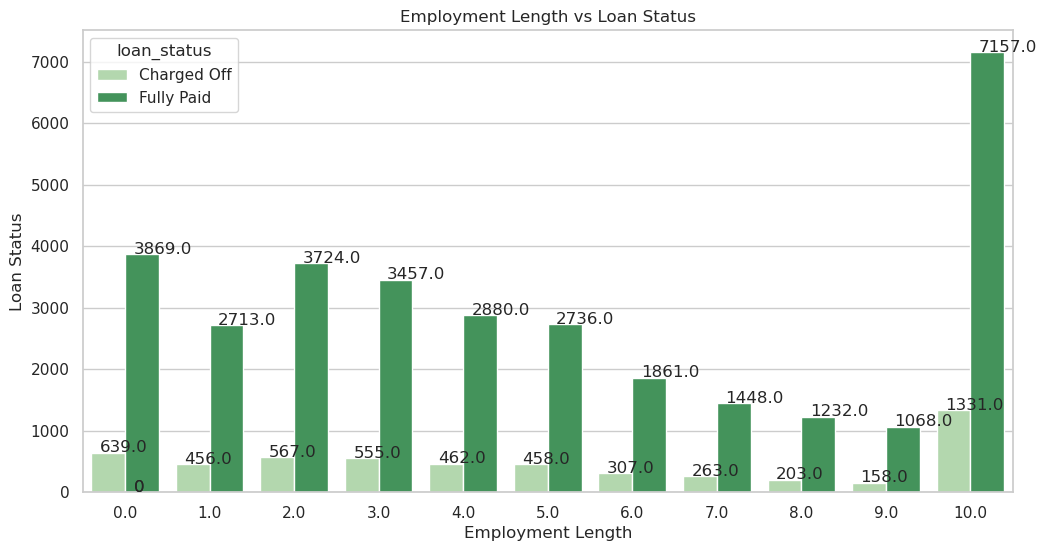

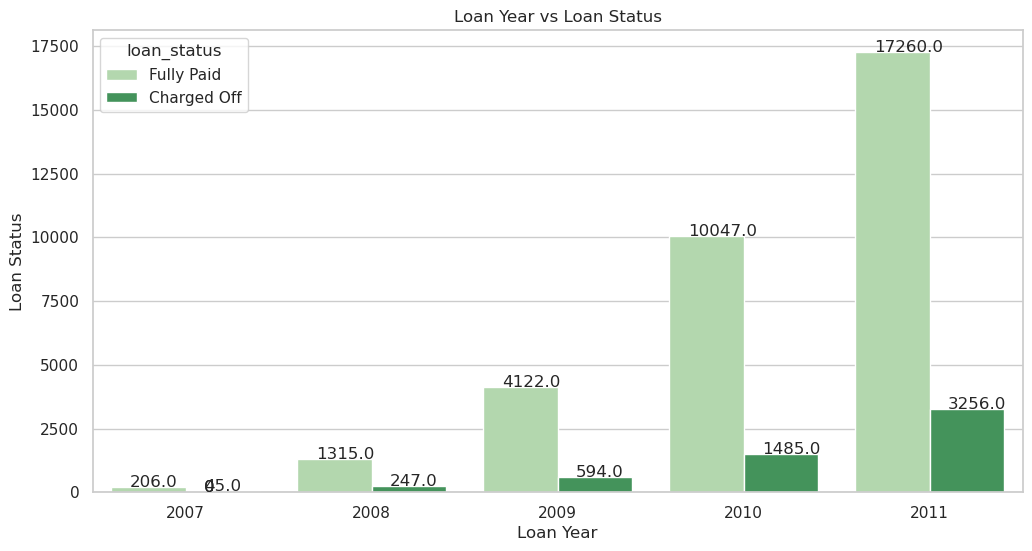

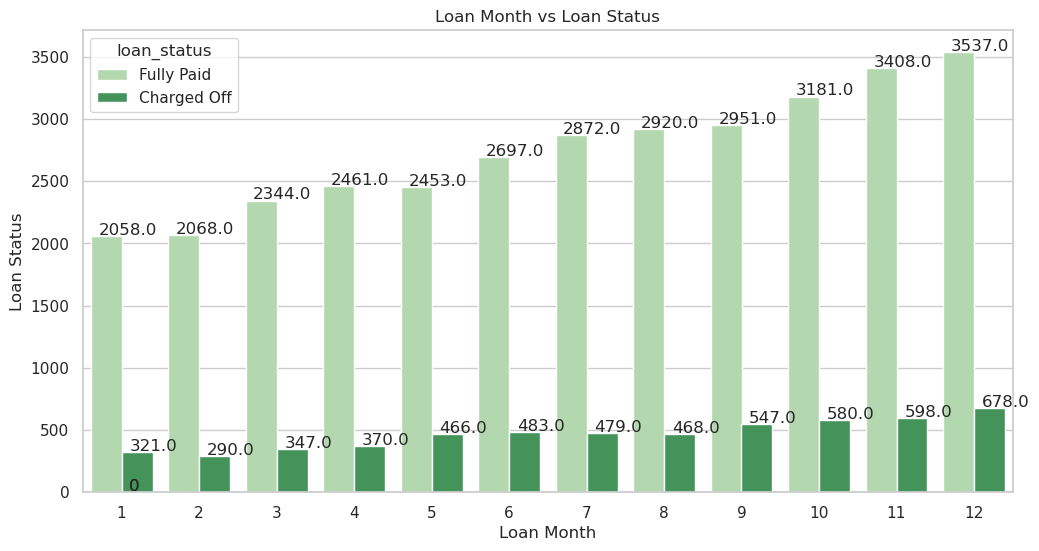

In [606]:
for bi_cat_var in [['grade','Grade'],
            ['sub_grade','Sub Grade'],
            ['term','Term'],
            ['emp_length','Employment Length'],
            ['issue_year','Loan Year'],
            ['issue_month','Loan Month']]:
    countplot_graph({
    'data': loan_df,
    'x': bi_cat_var[0],
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': bi_cat_var[1],
    'ylabel': 'Loan Status',
    'title': f'{bi_cat_var[1]} vs Loan Status',
    'palette': 'Greens'
})

### Bivariate Analysis of Unordered Categorical Variables

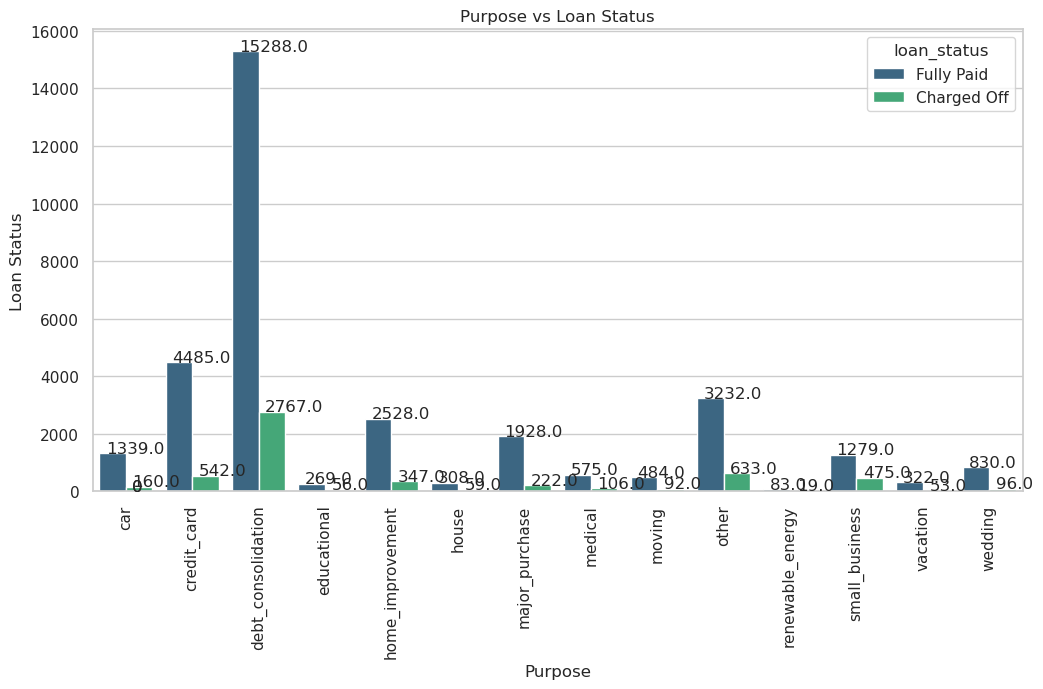

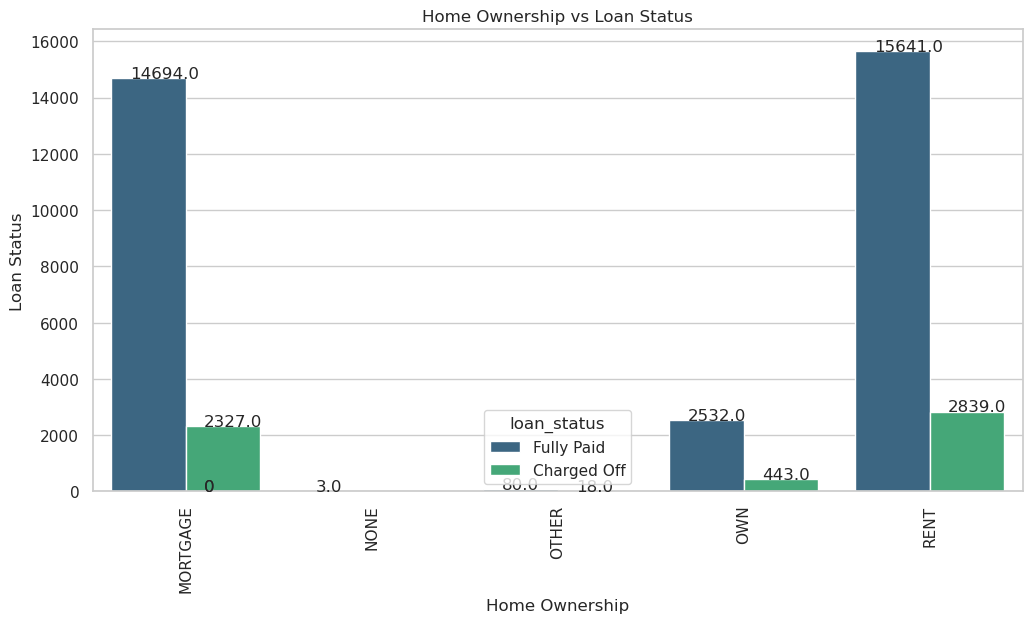

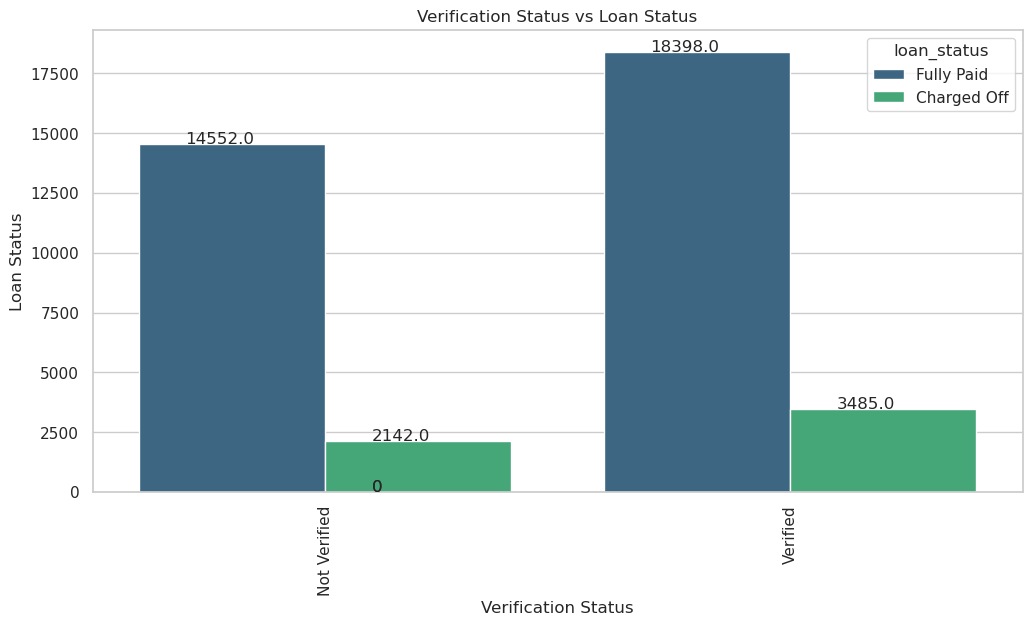

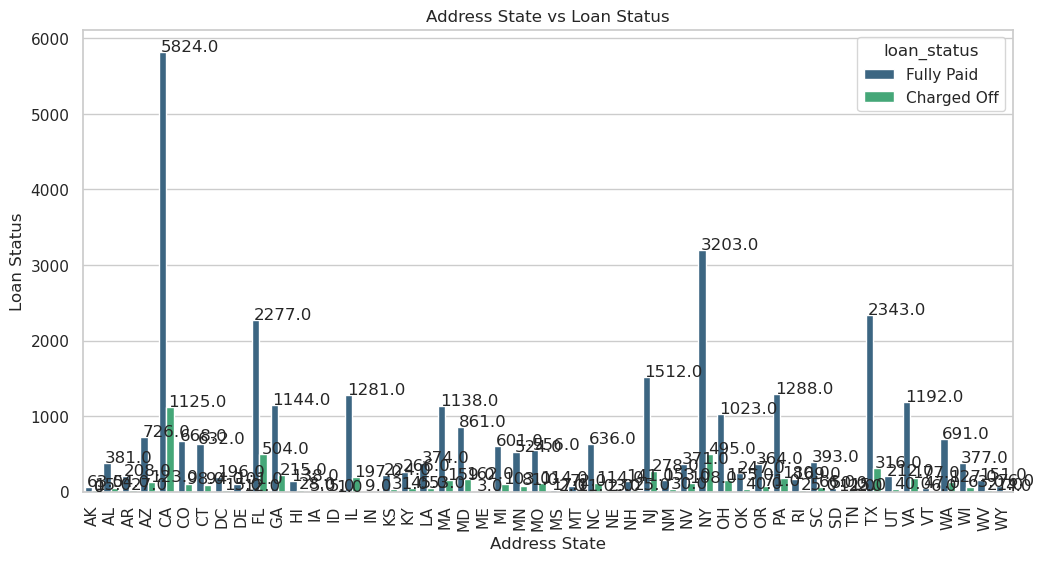

In [608]:
for bi_un_cat_var in [['purpose','Purpose'],
            ['home_ownership','Home Ownership'],
            ['verification_status','Verification Status'],
            ['addr_state','Address State']]:
    countplot_graph({
    'data': loan_df,
    'x': bi_un_cat_var[0],
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': bi_un_cat_var[1],
    'ylabel': 'Loan Status',
    'title': f'{bi_un_cat_var[1]} vs Loan Status',
    'palette': "viridis",
    'x_tick_rotation': 90
})

### Bivariate Analysis of Quantitative Variables

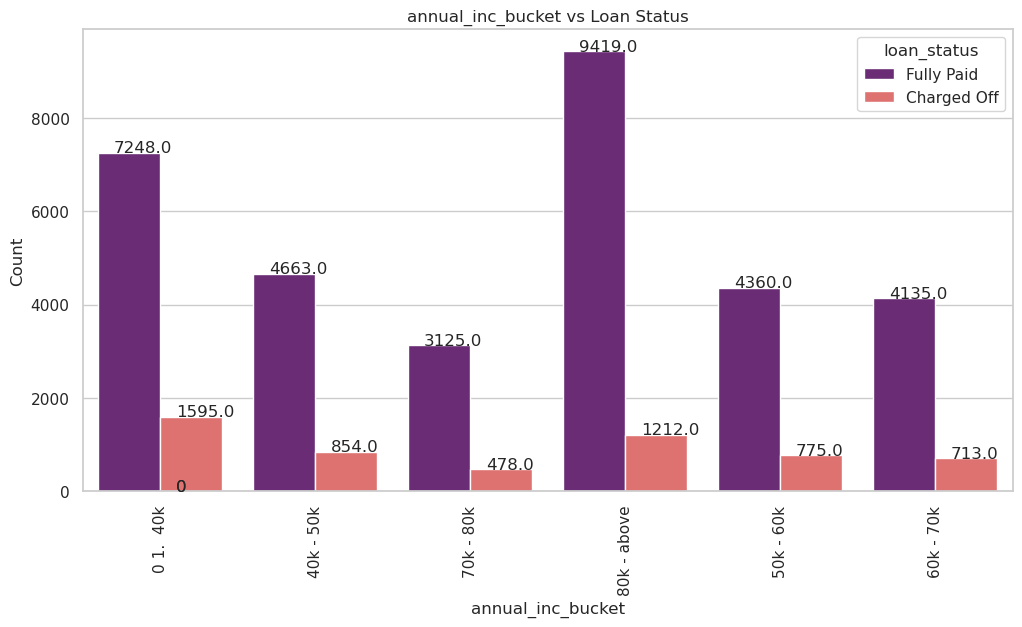

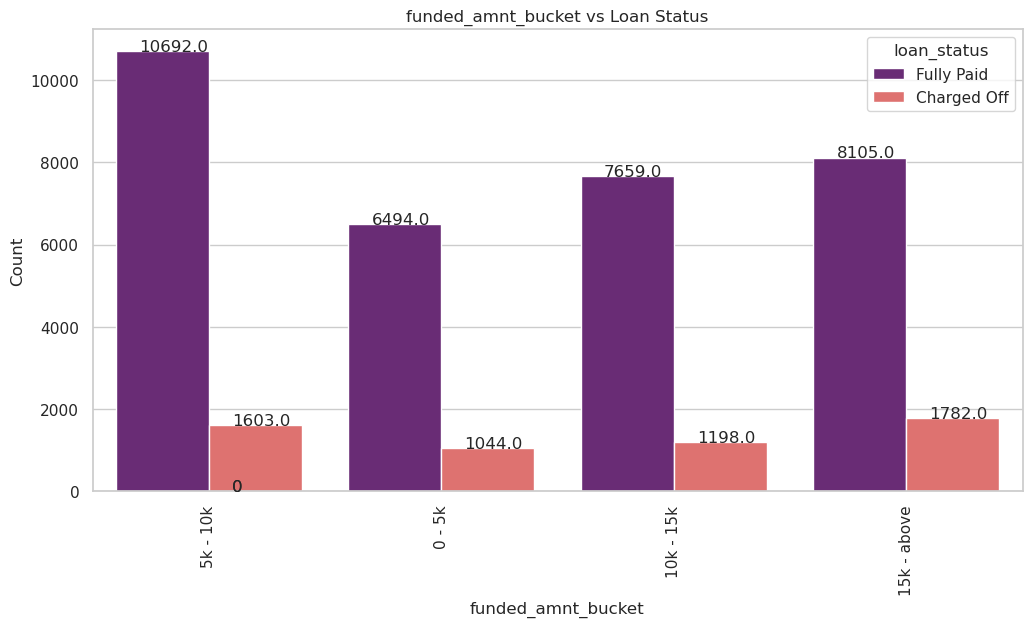

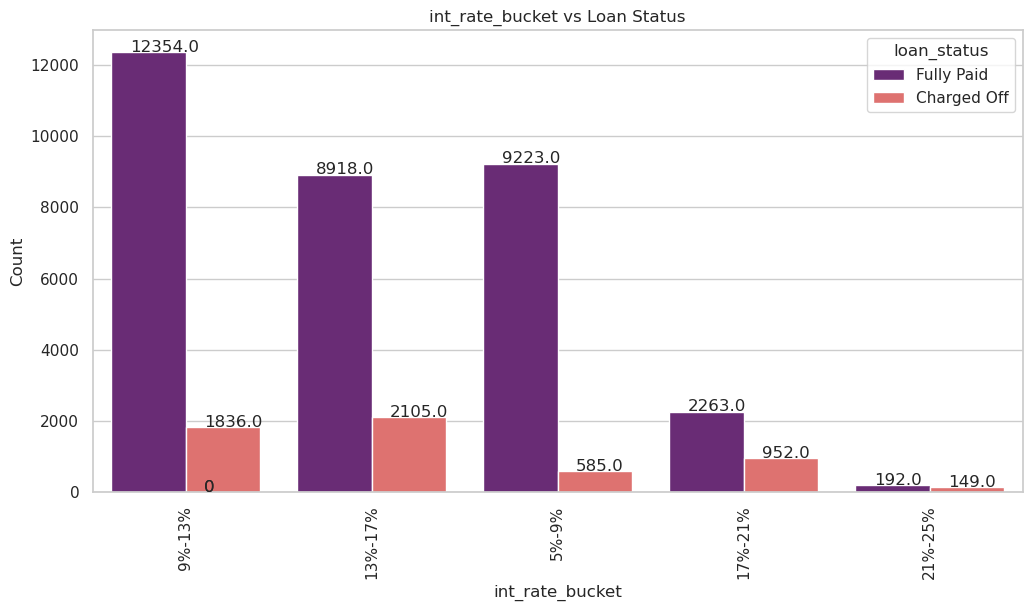

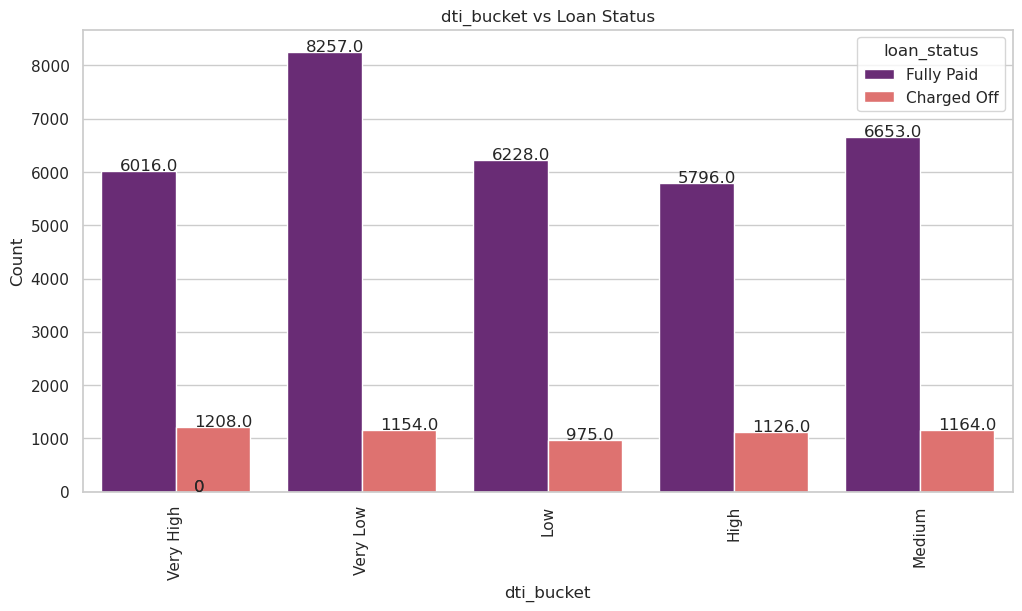

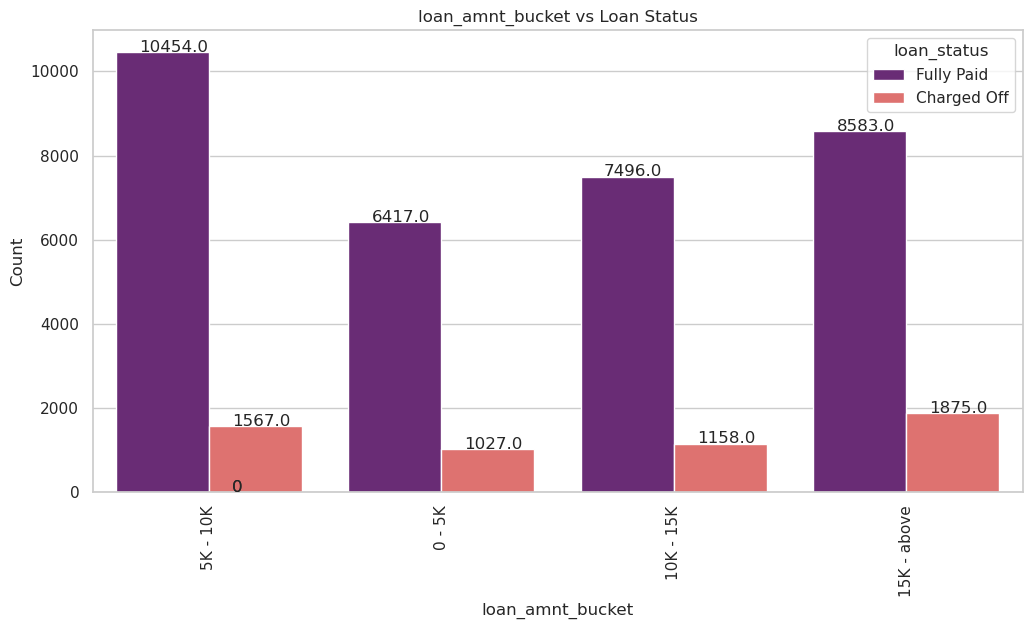

In [610]:
for bi_quan_var in ['annual_inc_bucket', 'funded_amnt_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_amnt_bucket']:
    countplot_graph({
    'data': loan_df,
    'x': bi_quan_var,
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': bi_quan_var,
    'ylabel': 'Count',
    'title': f'{bi_quan_var} vs Loan Status',
    'palette': "magma",
    'x_tick_rotation': 90
}, annot=True)

### Bivariate Analysis observations and inferences

1. **Risk Mitigation for Grades**: Since loan applicants from Grades B, C, and D contribute to most of the "Charged Off" loans, the company should tighten risk evaluation and apply stricter underwriting criteria for borrowers in these grades.

2. **Focus on Subgarades**: Applicants in Subgrades B3, B4, B5, C1 and C2 show a higher likelihood of default. The company might consider applying additional risk controls or offering these applicants lower loan amounts to mitigate risk.

3. **Experience and Default Probability**: Loan applicants with ten or more years of experience are more likely to default. This suggests that experience alone may not be a reliable indicator of creditworthiness. The company should use a more comprehensive credit scoring system that factors in other risk-related attributes.

4. **Growth in Loan Applicants**: The steady rise in loan applications from 2009 to 2011 shows market growth. The company should capitalize on this opportunity while reinforcing risk management strategies to stay competitive and secure.

5. **Seasonal Loan Demand**: The company sees an uptick in loan applications in December and Q4, possibly driven by holiday spending. It should prepare for this seasonal demand by optimizing loan processing during peak periods.

6. **Debt Consolidation Risk**: Since debt consolidation is the category with the maximum number of loans and high default rates, the company should carefully evaluate applicants seeking debt consolidation loans and potentially adjust interest rates or offer financial counseling services.

7. **Housing Status and Default Risk**: Applicants living in rented or mortgaged houses are more likely to default. This information can be considered in the underwriting process to assess housing stability and its impact on repayment ability.

8. **Verification Process Review**: Verified loan applicants are defaulting more than those who are not verified. The company should review its verification process to ensure it effectively assesses applicant creditworthiness and consider improvements or adjustments.

9. **High Loan Amount Risk**: Applicants requesting loans of 5k-10k or more have a greater default risk. The company should consider conducting more thorough assessments for higher loan amounts and potentially limiting loan size for high-risk borrowers.

10. **Int Rates**: High DTI ratios and interest rates in the range of 9% to 13% are linked to increased default rates. The company should revise how it determines interest rates and align them more closely with borrowers' DTI ratios to improve repayment capabilities.


### Multivariate Analysis

Multivariate analysis against Charged Off

1. Grade
2. Sub Grade
3. Emp length
4. Addr state
5. Home ownership
6. Verification
7. Annual inc
8. DTI
9. Int rate

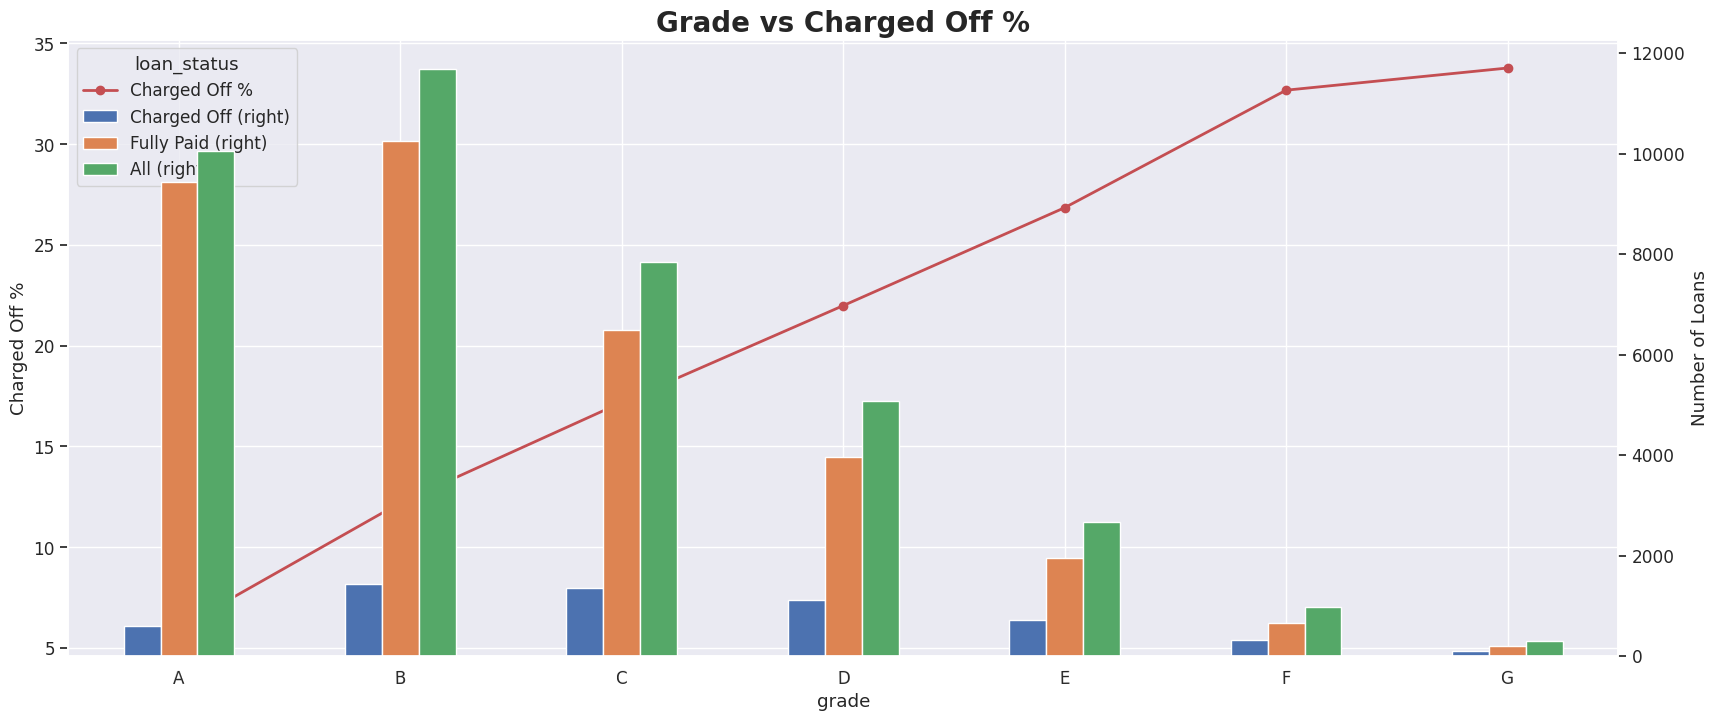

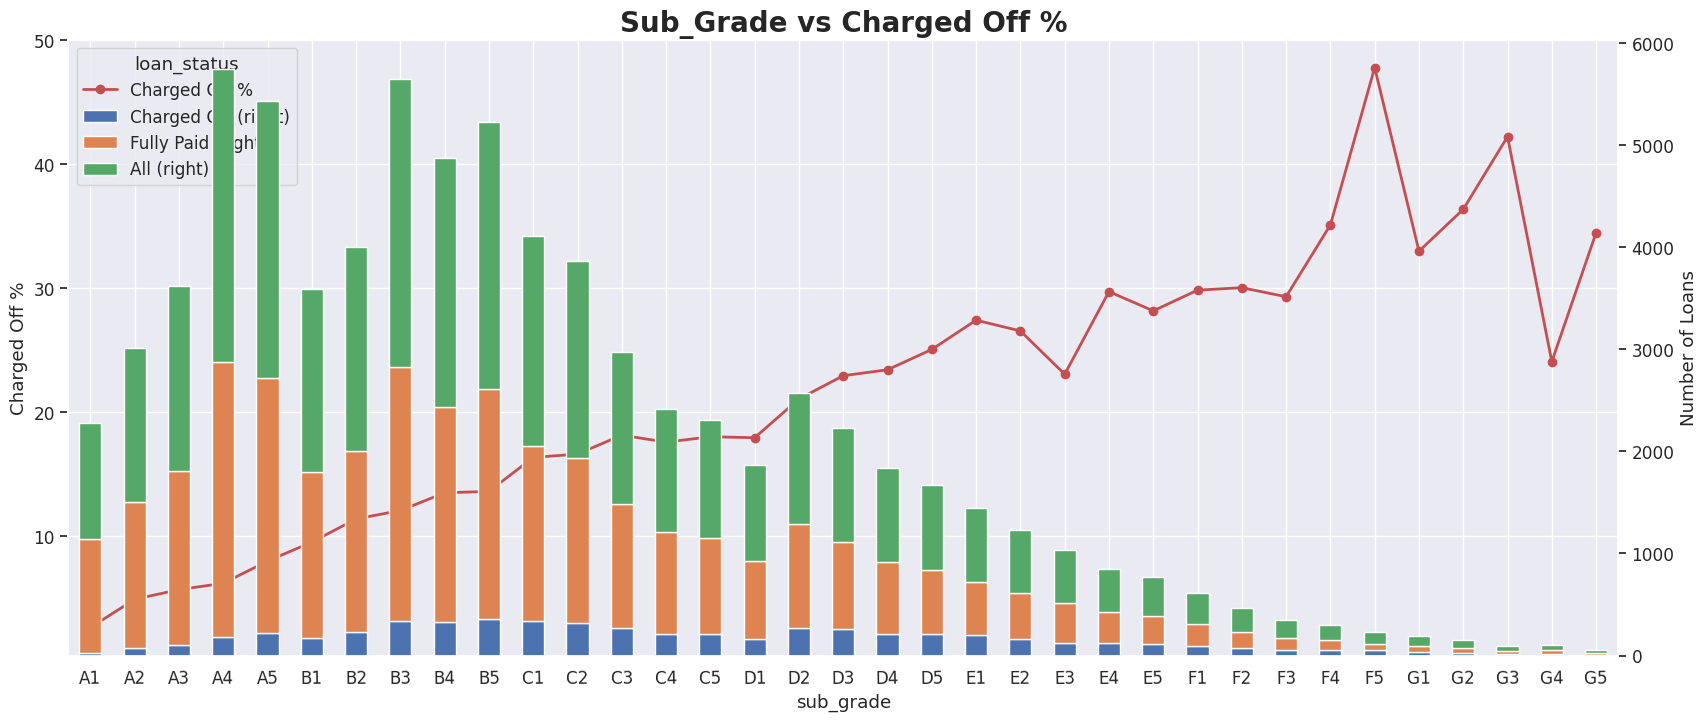

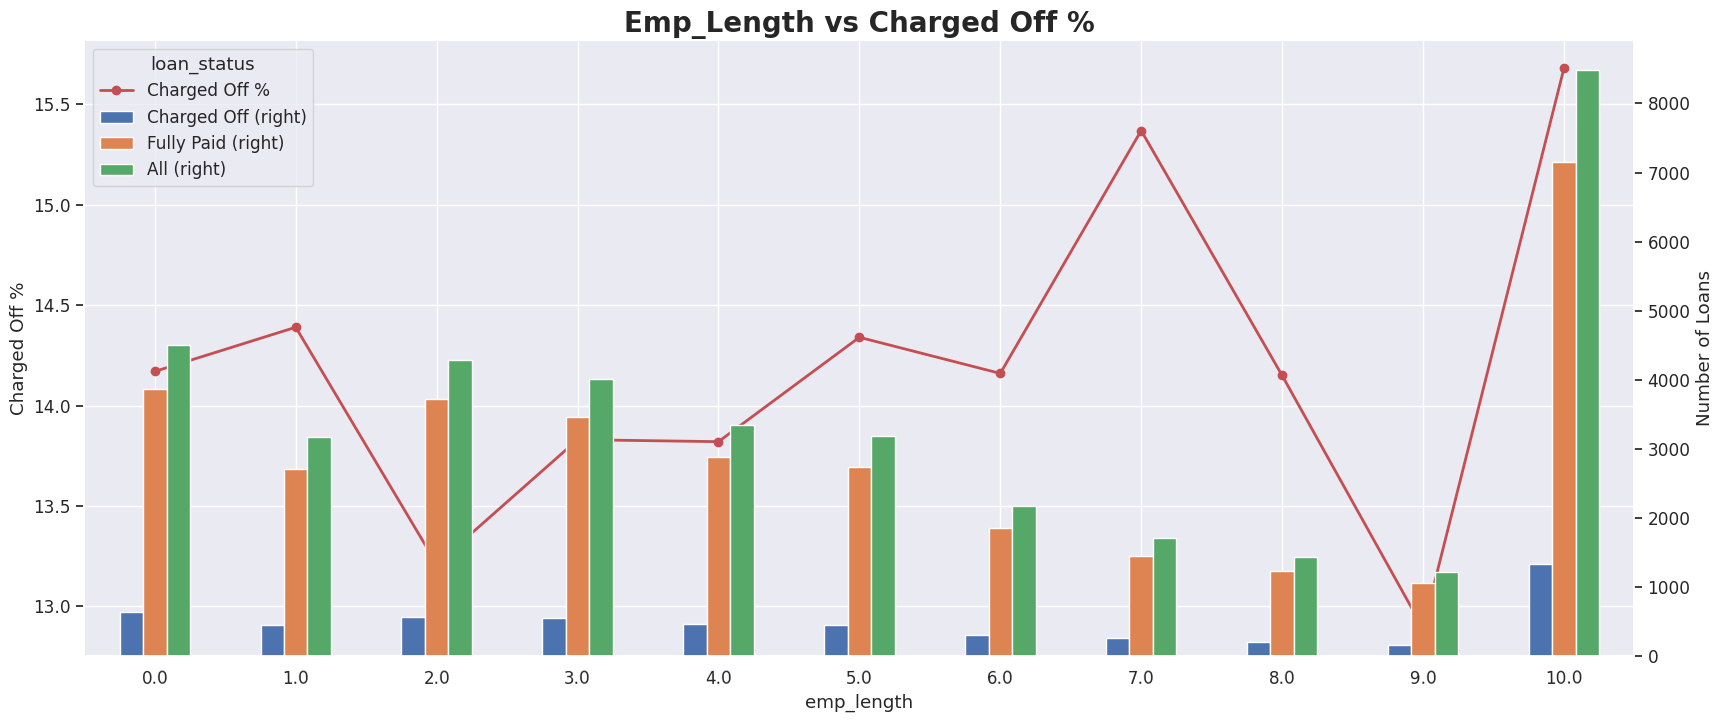

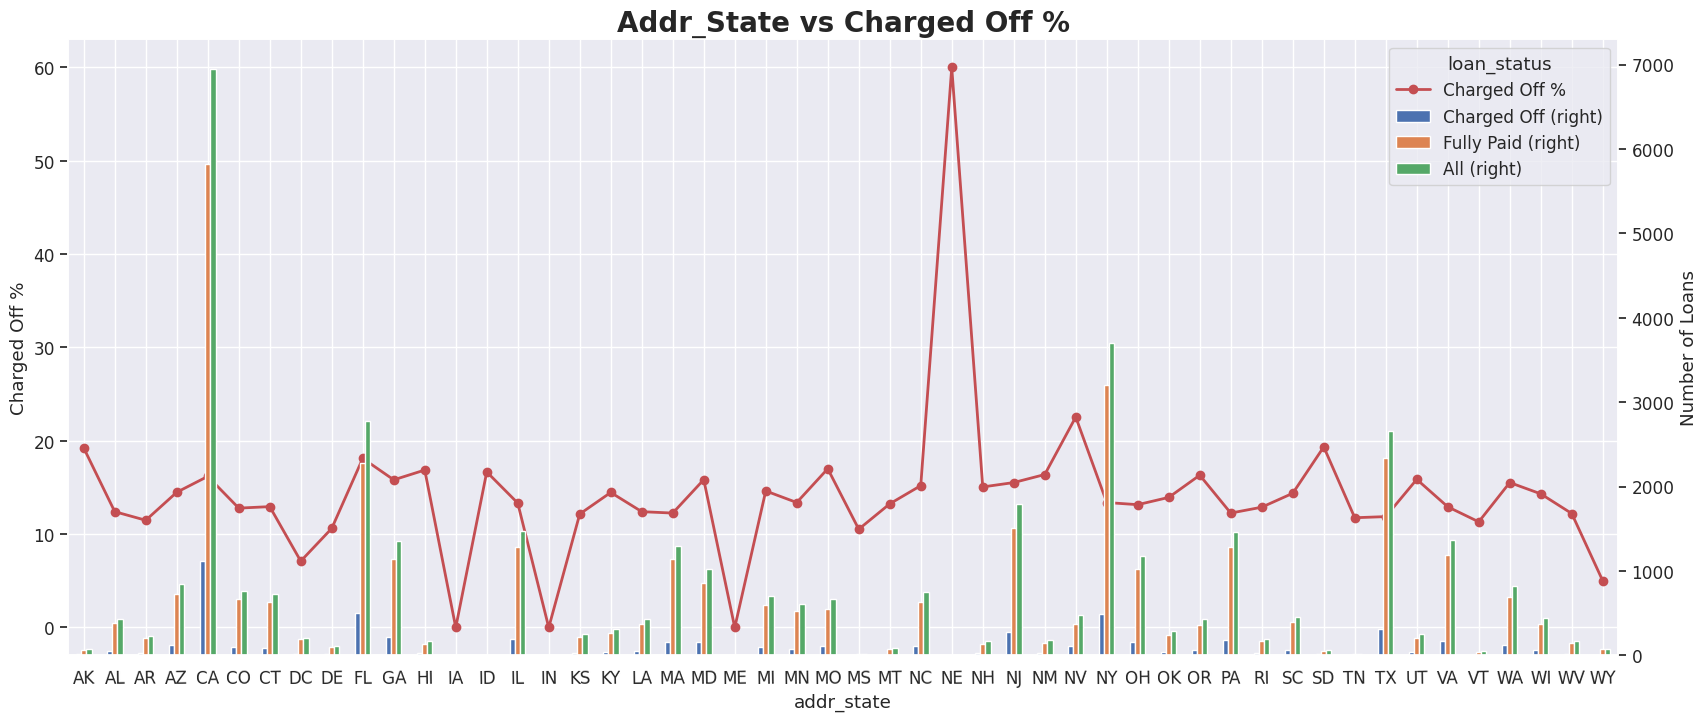

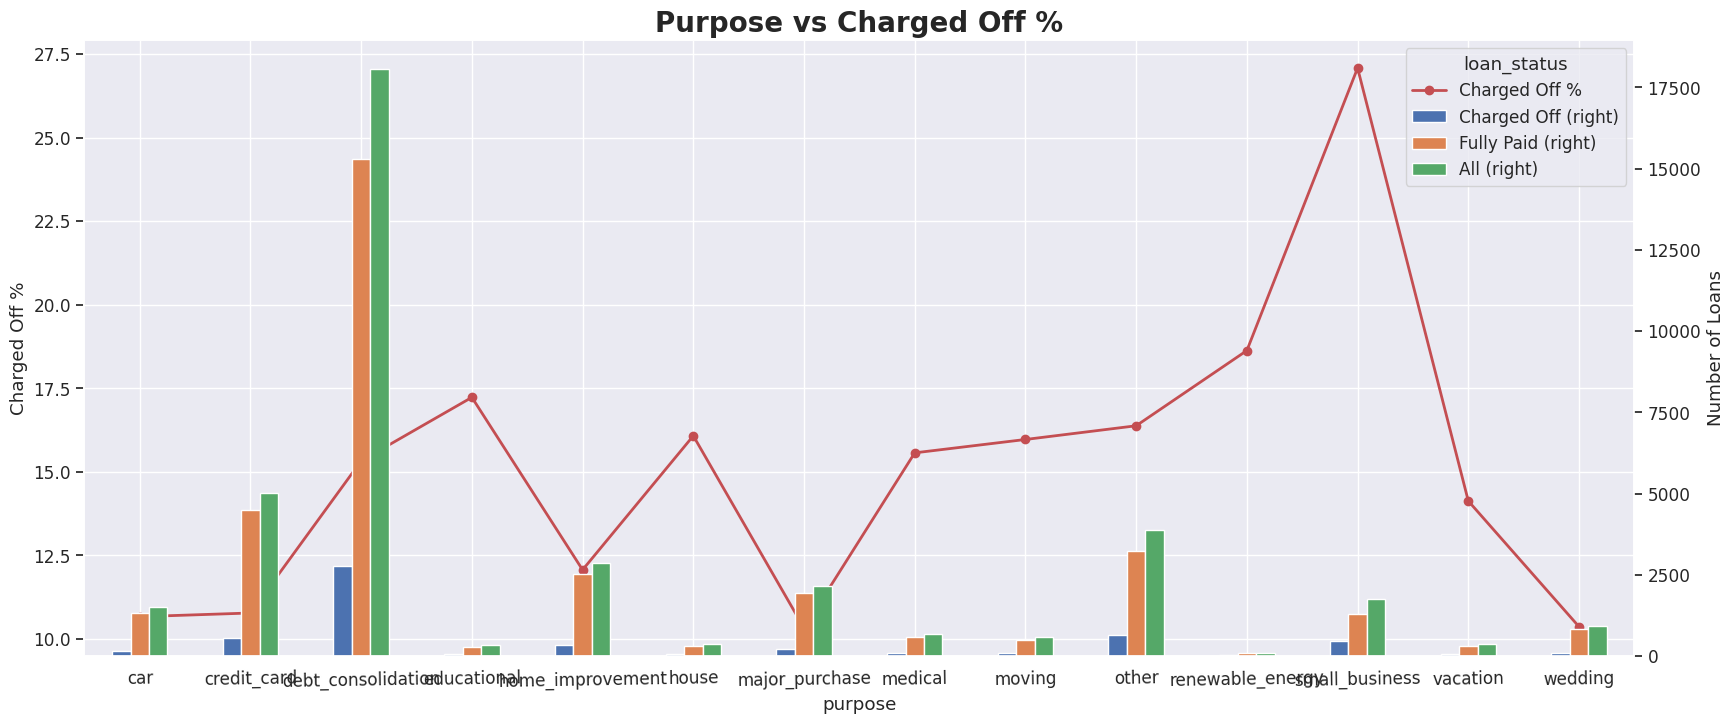

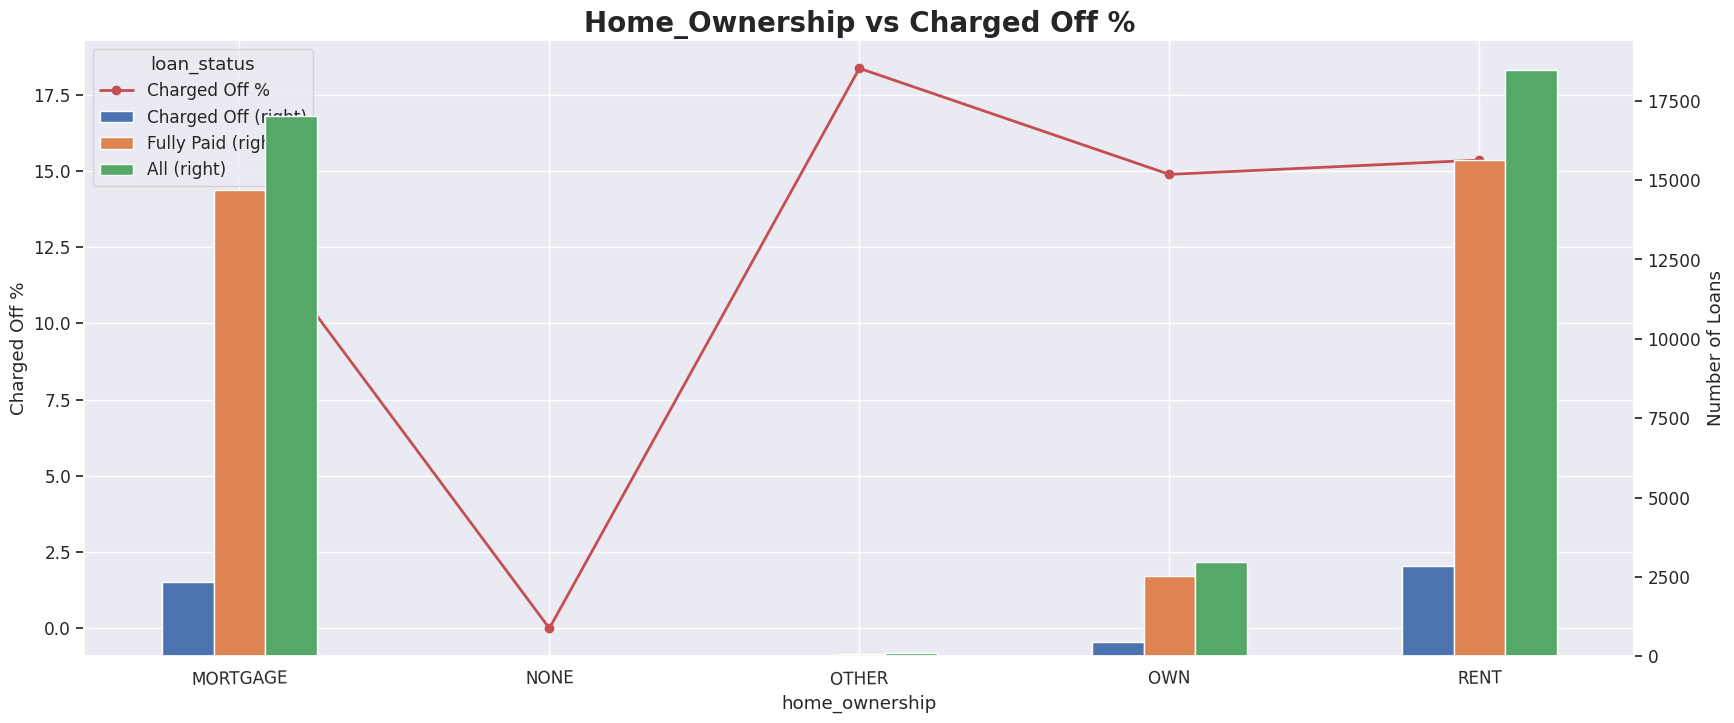

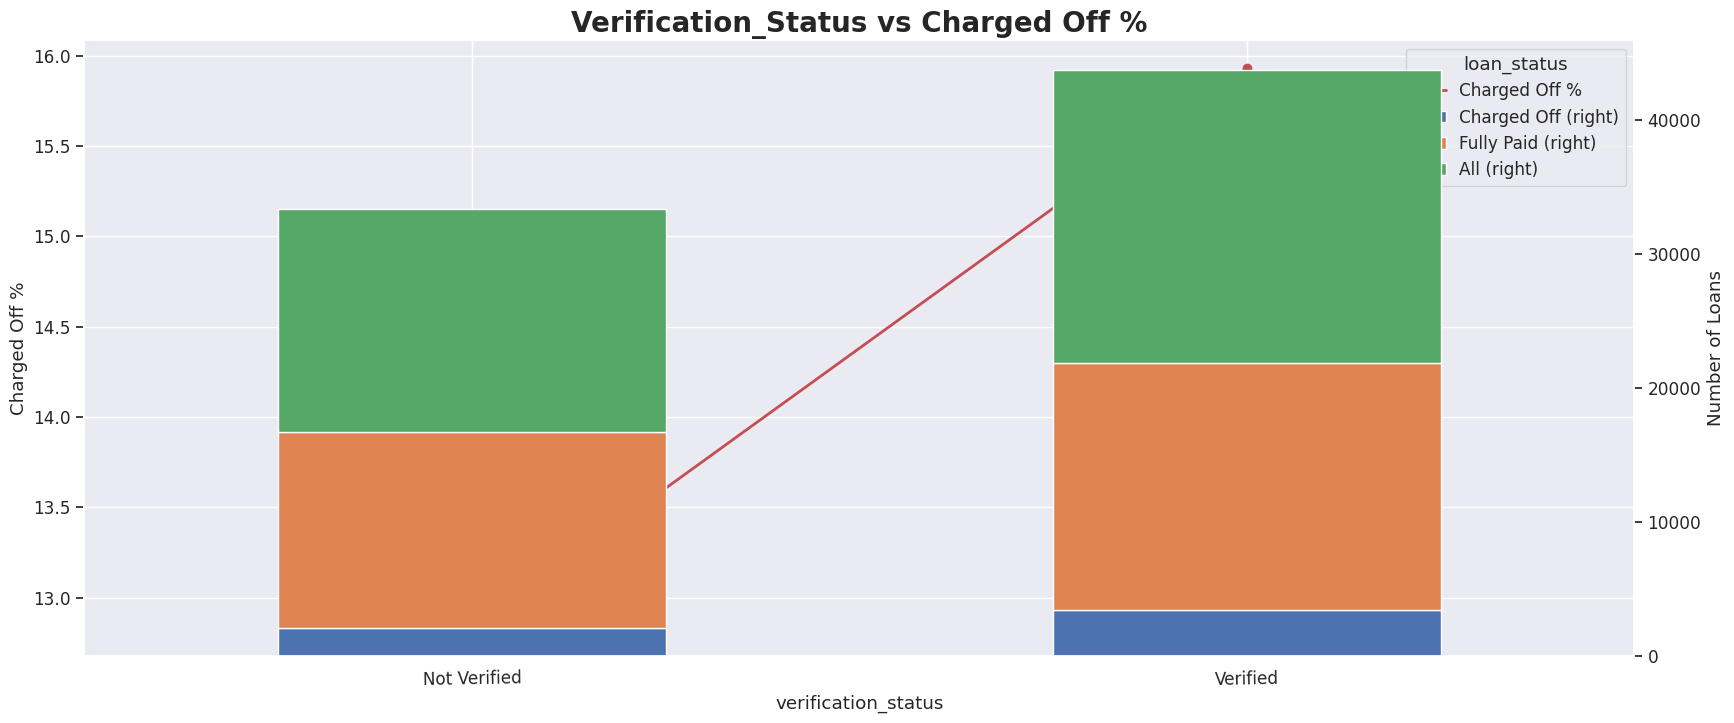

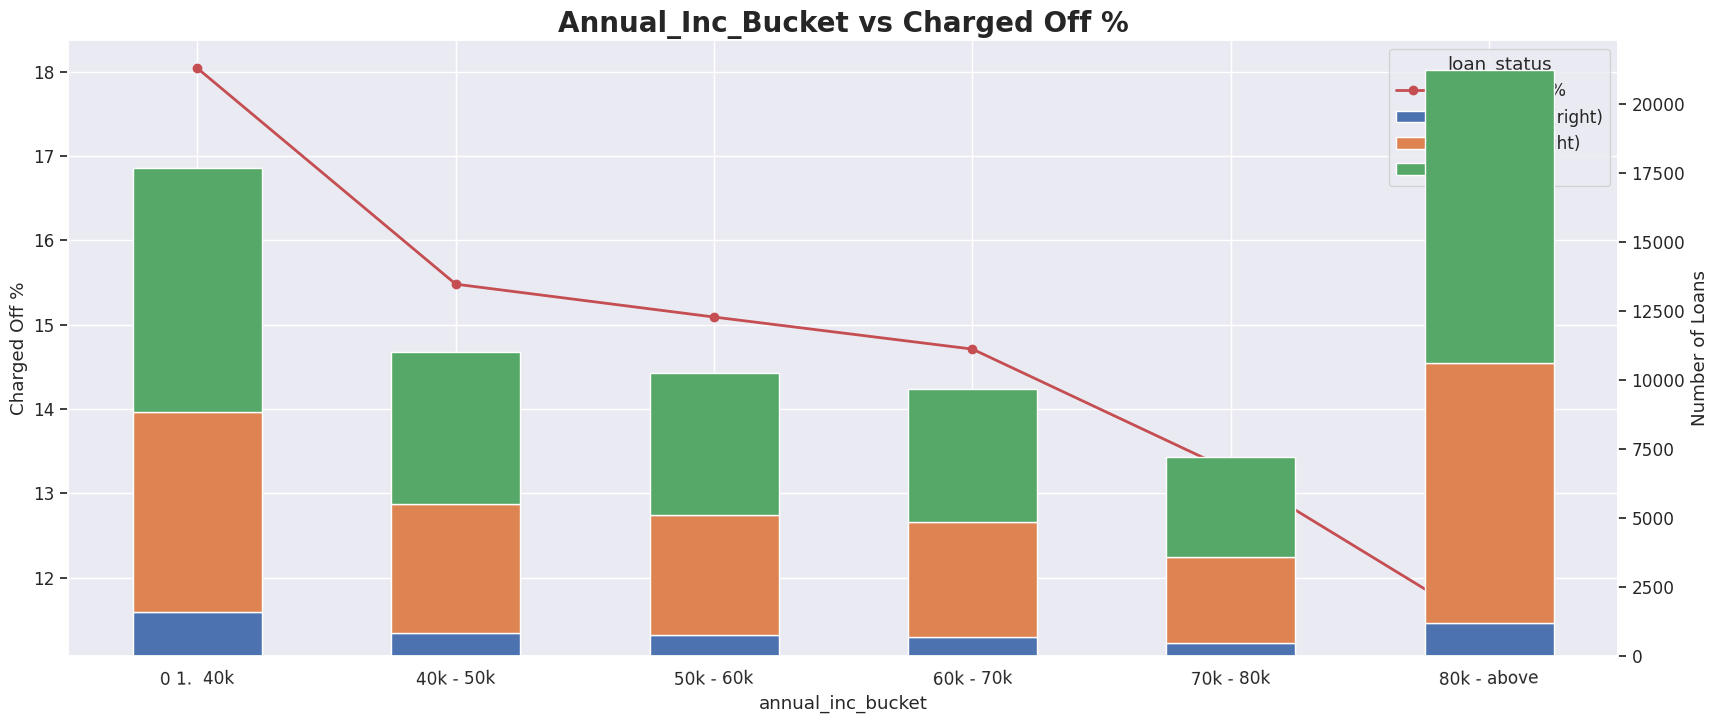

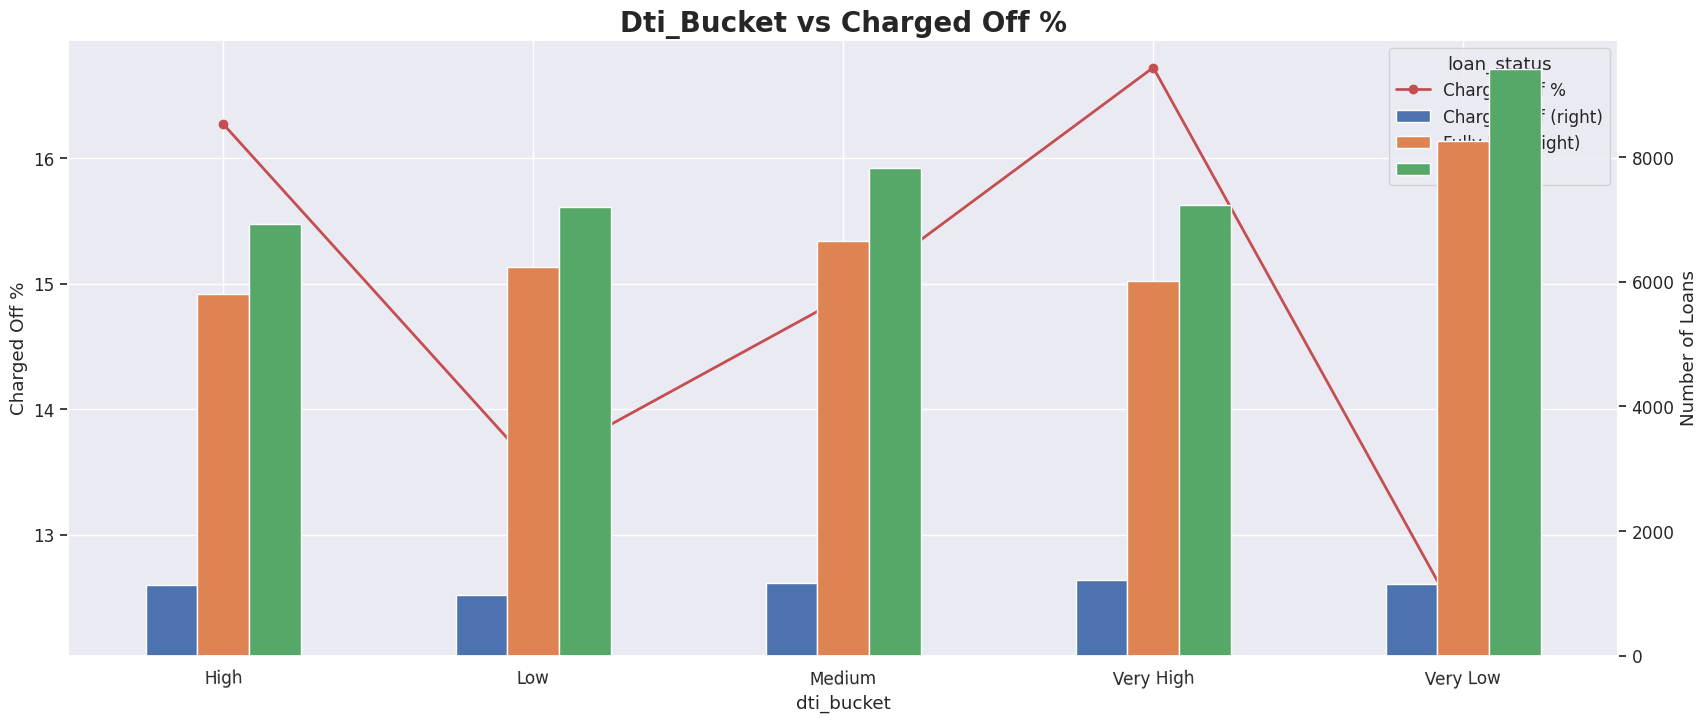

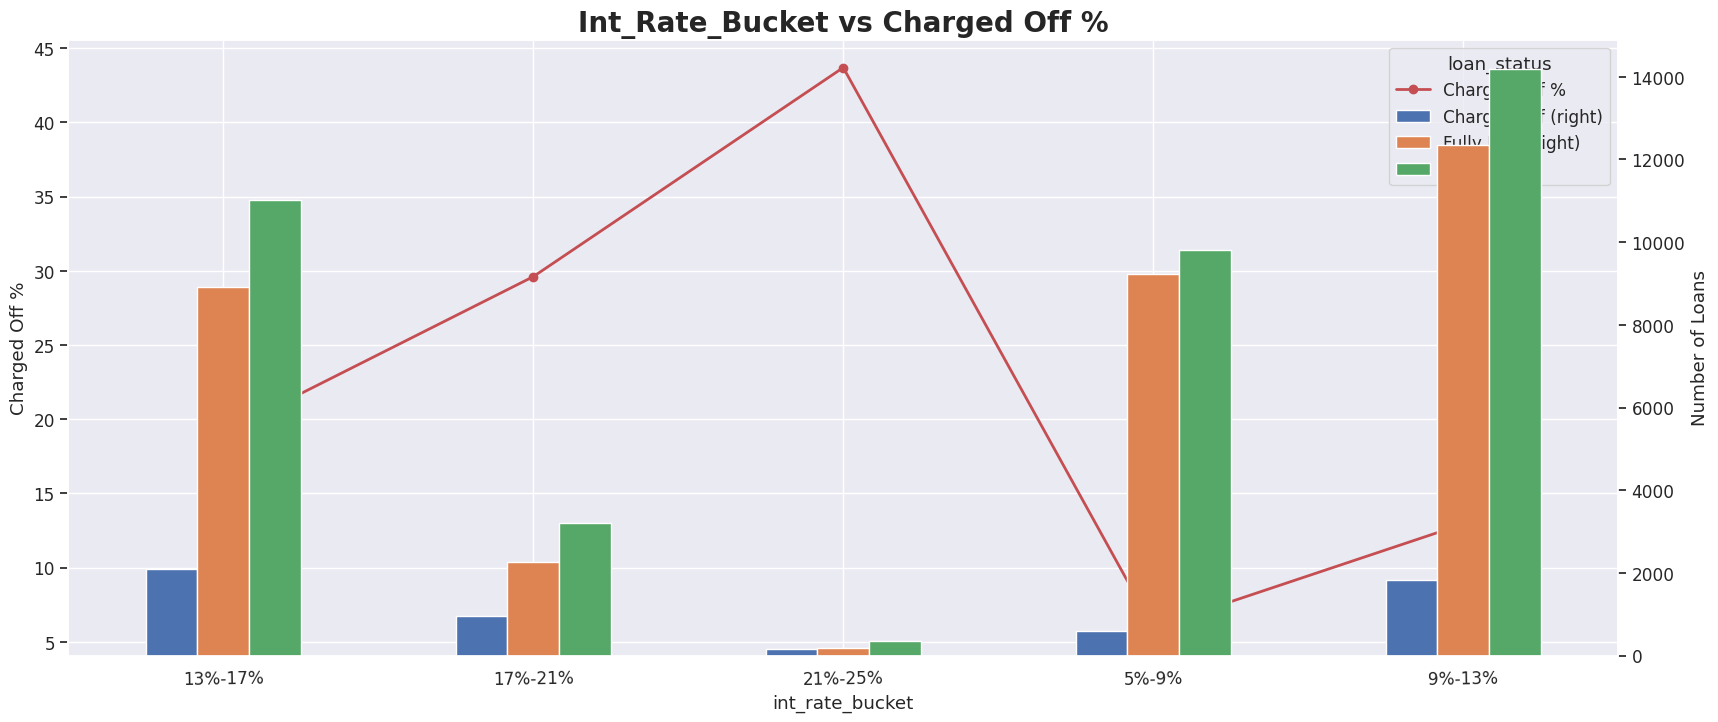

In [616]:
columns_config = {
    'grade': {},
    'sub_grade': {'stacked': True},
    'emp_length': {},
    'addr_state': {},
    'purpose': {},
    'home_ownership': {},
    'verification_status': {'stacked': True},
    'annual_inc_bucket': {'stacked': True},
    'dti_bucket': {},
    'int_rate_bucket': {}
}

for column, plot_config in columns_config.items():
    stacked = plot_config.get('stacked', False)
    plot_charged_off_percentage(loan_df, column, stacked)

### Multivariate Analysis observations and inferences

1. Loan applicants with grades B, C, and D exhibit a higher likelihood of defaulting on their loans.
2. Borrowers in sub-grades B3, B4, B5, C1 and C2 show the highest propensity to default.
3. Applicants with 10 years of work experience have the greatest probability of defaulting on their loans.
4. Borrowers from states like California (CA), Florida (FL), and New York (NY) demonstrate a higher likelihood of loan default.
5. Loan applicants who live in rented accommodations show a stronger tendency to default.
6. Borrowers with lower annual incomes are more prone to default, and this risk decreases as income levels rise.
7. There is a clear trend where higher interest rates are associated with a greater likelihood of loan default.

### Correlation Analysis

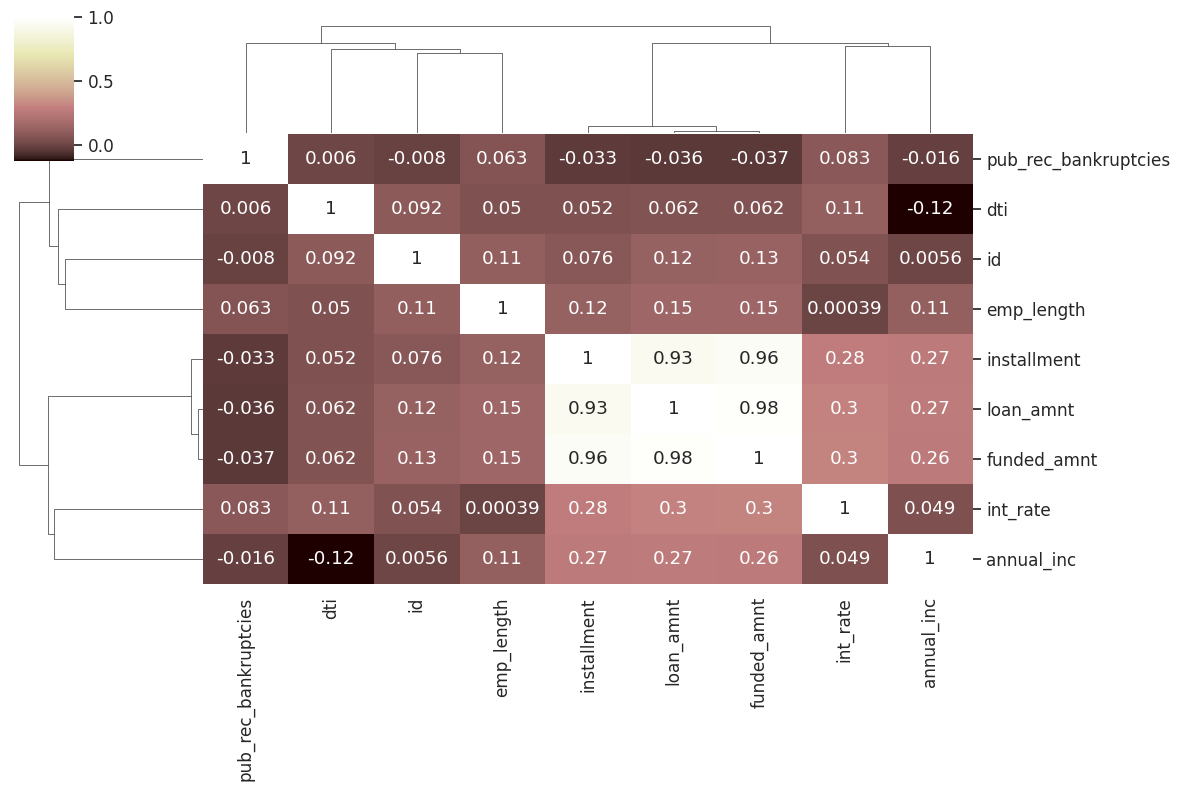

In [613]:
correlation_df = loan_df.copy()

# Drop irrelevant columns
correlation_df = correlation_df.drop(['issue_year', 'issue_month'], axis = 1)
corr = correlation_df.corr(numeric_only = True)
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="pink")
plt.show()


## Correlation Metrics observations and inferences

**Strong Correlation**
- installment shows a strong correlation with funded_amnt, loan_amnt, and funded_amnt_inv
- term shows a strong correlation with interest rate
- annual_inc shows a strong correlation with loan_amount


**Weak Correlation**
- dti shows weak correlation with many fields
- emp_length shows weak correlation with many fields


**Negative Correlation**
- pub_rec_bankrupticies shows a negative correlation with almost every field
- annual_inc shows a negative correlation with dti
